<h1 style="font-family: Arial; font-weight: 900; color: magenta; text-align: center;">CLASSIFICATION AND LINEAR REGRESSION<br>WITH SCIKIT-LEARN</h1><br>

<br/><div style="font-family: Arial; color: darkblue; font-size: 14px; font-weight: 600"><a id="toc"></a>
In this part 3:
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[1. The perceptron with scikit-learn](#1)</p>
        <p style="margin: 0 0 0 4rem">[1a. Multi-label classification with OvR](#1a)</p>
        <p style="margin: 0 0 0 4rem">[1b. Training the perceptron with scikit-learn](#1b)</p>
        <p style="margin: 0 0 0 4rem">[1c. Presenting the perceptron's results with Matplotlib](#1c)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[2. The logistic regression](#2)</p>
        <p style="margin: 0 0 0 4rem">[2a. The logistic sigmoid function](#2a)</p>
        <p style="margin: 0 0 0 4rem">[2b. The logistic regression strategy](#2b)</p>
        <p style="margin: 0 0 0 4rem">[2c. The logistic loss function](#2c)</p>
        <p style="margin: 0 0 0 4rem">[2d. The Hessian of the logistic loss function](#2d)</p>
        <p style="margin: 0 0 0 4rem">[2e. Logistic regression with the Batch Gradient Descent](#2e)</p>
        <p style="margin: 0 0 0 4rem">[2f. Logistic regression with scikit-learn](#2f)</p>
        <p style="margin: 0 0 0 4rem">[2g. Overfitting and regularization](#2g)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[3. Support vector machines](#3)</p>
        <p style="margin: 0 0 0 4rem">[3a. Linear SVM Classification. The hard margin case](#3a)</p>
        <p style="margin: 0 0 0 4rem">[3b. Linear SVM Classification. The soft margin case](#3b)</p>
        <p style="margin: 0 0 0 4rem">[3c. Examples of soft margin linear classification (hyperplane and polynomial decision boundaries)](#3c)</p>
        <p style="margin: 0 0 0 4rem">[3d. Positive definite kernels and RKHS](#3d)</p>
        <p style="margin: 0 0 0 4rem">[3e. Solving nonlinear problems using a kernel SVM](#3e)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[3f. Examples of nonlinear kernel SVM](#3f)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[4. Decision trees and random forests](#4)</p>
        <p style="margin: 0 0 0 4rem">[4a. What is a decision tree ?](#4a)</p>
        <p style="margin: 0 0 0 4rem">[4b. Building a decision tree](#4b)</p>
        <p style="margin: 0 0 0 4rem">[4c. Example of a decision tree](#4c)</p>
        <p style="margin: 0 0 0 4rem">[4d. Random forests](#4d)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[Appendix - k-nearest neighbors](#Appendix)</p></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# The datasets we will use
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

# Beautify code results using colors
from colorama import Fore, Back, Style
# Define some strings for cleaner code
BB = Fore.BLUE + Style.BRIGHT
MB = Fore.MAGENTA + Style.BRIGHT

# Beautify figures by rendering them in SVG quality instead of PNG
# (don't use this if you prefer lightweight notebooks)
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
# we'll use the "cyberpunk" color map
cmap = plt.get_cmap("cool")

<a id="1"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>1. THE PERCEPTRON WITH SCIKIT-LEARN</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1a. Multi-label classification with OvR</font><a id="1a"></a></p>$\quad$
        <font color='darkpink'>OvR</font>, the <font color='darkpink'>One versus the Rest</font> method, which is sometimes called <font color='darkpink'>One versus All</font> (<font color='darkpink'>OvA</font>), extends binary classifiers to multiclass problems. The idea is to train one classifier per class, treating that class as positive (class <font color='1aabff'>$1$</font>), while all other classes are grouped as negative (class <font color='1aabff'>$0$</font>).<br>$\quad$
        For a dataset with <font color='1aabff'>$K$</font> classes, we train <font color='1aabff'>$K$</font> binary classifiers. Then, suppose we want to classify a new, unlabeled data instance <font color='1aabff'>$x$</font>. For any <font color='#1aabff'>$\,k=0,\cdots,K\!-\!1\,$</font>, the <font color='#1aabff'>k</font>-th binary classifier outputs a <font color='darkpink'>confidence score</font>, say <font color='#1aabff'>$c_k(x)$</font>, which determines if <font color='1aabff'>$x$</font> is in its positive class. For the most often used algorithms, like the <font color='#cc33ff'>logistic regression</font> (see below, "2b. The logistic regression strategy"), <font color='#1aabff'>$c_k(x)$</font> is a probability; with the <font color='#cc33ff'>Perceptron</font>, <font color='#1aabff'>$c_k(x)$</font> is a <font color='#cc33ff'>net input</font> (see part 2, "1a. Presentation"). The <font color='#cc33ff'>OvR</font> method predicts that <font color='1aabff'>$x$</font> belongs to the class which gives it the highest <font color='#cc33ff'>confidence score</font>.<br>$\quad$
        As an example, in this chapter, we will use <font color='#cc33ff'>OvR</font> with the <font color='#cc33ff'>Perceptron</font> in order to classify between the $3$ classes of the <font color='#cc33ff'>Iris dataset</font>.

<br><br><div style="font-family: Arial; font-size:14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1b. Training the perceptron with scikit-learn</font><a id="1b"></a></p>$\quad$
        The <font color='#cc33ff'>scikit-learn</font> library offers not only a large variety of learning algorithms, but also many convenient functions to preprocess data and to fine-tune and evaluate our models. In this chapter we will focus on the learning algorithms.<br>$\quad$
    To get started with the <font color='#cc33ff'>scikit-learn</font> library, we will train a <font color='#cc33ff'>Perceptron</font> model similar to the one that we implemented in the previous part (see "1. The perceptron", especially "1d. A code for the perceptron"). For simplicity, we will use the already familiar <font color='#cc33ff'>Iris dataset</font> (introduced in part 1, "2b. Notations") throughout the following sections. Conveniently, the <font color='#cc33ff'>Iris dataset</font> is already available via <font color='#cc33ff'>scikit-learn</font>. Similar to the previous part ("1e. Example with the Iris dataset"), we will only use two features from the <font color='#cc33ff'>Iris dataset</font> for visualization purposes, but this time we will keep the petal length and the petal width, instead of the petal and sepal lengths :

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print(BB + "Class labels :" + MB, np.unique(y))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y)
print(BB + "Labels counts in y :" + MB, np.bincount(y))
print(BB + "Labels counts in y_train :" + MB, np.bincount(y_train))
print(BB + "Labels counts in y_test :" + MB, np.bincount(y_test))

Class labels : [0 1 2]
Labels counts in y : [50 50 50]
Labels counts in y_train : [35 35 35]
Labels counts in y_test : [15 15 15]


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        As we can infer, the Iris flower class names, <font color='#cc33ff'>Iris-setosa</font>, <font color='#cc33ff'>Iris-versicolor</font> and <font color='#cc33ff'>Iris-virginica</font>, are already stored as integers ($0$, $1$ and $2$ respectively).<br>$\quad$
        Also, in order to evaluate how well a trained model performs on unseen data, we have used the <font color='#cc33ff'>train_test_split</font> function from <font color='#cc33ff'>scikit-learn</font>’s <font color='#cc33ff'>model_selection</font> module, to randomly split the <font color='#1aabff'>X</font> and <font color='#1aabff'>y</font> arrays into $30\%$ test data ($45$ examples) and $70\%$ training data ($105$ examples). Obviously, <font color='#cc33ff'>train_test_split</font> always shuffles the training dataset internally before splitting; otherwise, here, all examples from class <font color='#1aabff'>0</font> and class <font color='#1aabff'>1</font> would have ended up in the training datasets, and the test dataset would consist of 45 examples from class <font color='#1aabff'>2</font>; thus specifying a fixed random seed (with <font color='#cc33ff'>random_state=1</font>) simply ensures reproducibility. At last, <font color='#cc33ff'>stratify = y</font> ensures that the training and the test subsets have the same proportions of class labels as the input dataset.</div>

<div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The first thing to do before training a model is to prepare the data. This is the topic of the next part ("Data preprocessing"). Here, we merely <font color='#cc33ff'>standardize</font> the features so that no feature has particular importance in the computation of the cost (see part 2, "3d. Standardization").<br/>$\quad$
        We <font color='#cc33ff'>standardize</font> the features, using the <font color='#cc33ff'>StandardScaler</font> class from <font color='#cc33ff'>scikit-learn</font>’s <font color='#cc33ff'>preprocessing</font> module. We initialize a new <font color='#cc33ff'>StandardScaler</font> object that we assign to the <font color='#5555ff'>sc</font> variable. Then we fit <font color='#5555ff'>sc</font> to the training dataset <font color='#1aabff'>X_train</font>, so that it computes and stores the mean and standard deviation of each feature of <font color='#1aabff'>X_train</font>. Now we can <font color='#cc33ff'>standardize</font> the training matrix, and we call <font color='#1aabff'>X_train_std</font> the <font color='#cc33ff'>standardized</font> matrix. We will train our linear model (here the <font color='#cc33ff'>Perceptron</font>) on the <font color='#1aabff'>X_train_std</font> matrix, and obtain the weights associated to it; so if we want to predict the classes of new observations we will first need to transform them using the same affine transformation <font color='#5555ff'>sc.transform</font>; consequently, to test our model we first transform our test dataset <font color='#1aabff'>X_test</font> using <font color='#5555ff'>sc.transform</font>; we call <font color='#1aabff'>X_test_std</font> the resulting matrix :

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Having prepared the training data, we can now train a <font color='#cc33ff'>Perceptron</font> model.<br>$\quad$
        Previously, most algorithms in <font color='#cc33ff'>scikit-learn</font> natively supported the <font color='#cc33ff'>One versus the Rest</font> (<font color='#cc33ff'>OvR</font>) method, via the <font color='#cc33ff'>multi_class</font> argument, which could take the value <font color='#cc33ff'>'ovr'</font> classification. The book makes extensive use of it. However, starting from <font color='#cc33ff'>scikit-learn 1.5</font>, the <font color='#cc33ff'>multi_class</font> argument has been deprecated and will be removed in <font color='#cc33ff'>scikit-learn 1.7</font>. Starting from <font color='#cc33ff'>scikit-learn 1.7</font>, to use the <font color='#cc33ff'>OvR</font> method with a binary classifier, we will need to wrap the classifier inside the <font color='#cc33ff'>OneVsRestClassifier(estimator, n_jobs=None)</font> class, where :<ul>
    <li><font color='#cc33ff'>estimator</font> is the binary classifier</li>
    <li><font color='#cc33ff'>n_jobs=None</font> is the number of CPU cores to use for parallel execution - $1$ by default -</li></ul><div style="margin-top: 20px"></div>$\quad$
        As of May 2025, the book's code snippets still work, but I prefer to use the future version, since it is available. I use it to fit a <font color='#cc33ff'>Perceptron</font> on the three flower classes of the <font color='#cc33ff'>Iris dataset</font>. The code is as follows, where <font color='#cc33ff'>eta0</font> is the learning rate (see our previous part, "1b. The perceptron algorithm"); we used the <font color='#cc33ff'>random_state</font> parameter to ensure the reproducibility of the initial shufflings of the training dataset (performed after each epoch) :

In [4]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron

ppn = OneVsRestClassifier(Perceptron(eta0=0.1, random_state=1))
ppn.fit(X_train_std, y_train)

OneVsRestClassifier(estimator=Perceptron(eta0=0.1, random_state=1))

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Having trained our <font color='#cc33ff'>Perceptron</font>, we can make predictions via the <font color='#cc33ff'>predict</font> method; note that <font color='#cc33ff'>%d</font> is a placeholder for an integer, and the value to be inserted is provided after the <font color='#cc33ff'>%</font> operator which follows, so here it will be the total number of instances whose labels are not equal to what our <font color='#cc33ff'>Perceptron</font> predicted.

In [5]:
y_pred = ppn.predict(X_test_std)
print(BB + "Misclassified examples : " + MB + "%d" % (y_test != y_pred).sum())

Misclassified examples : 5


<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We see that only $1$ instance was misclassified. We say that the <font color='darkpink'>misclassification error</font> is $\frac{1}{45}$ or approximately $2.2\%$. Or, equivalently, that our model has a <font color='darkpink'>training accuracy</font> of $\frac{44}{45}$ or approximately $97.8\%$.<br>$\quad$
        There are two ways to obtain the <font color='darkpink'>test accuracy</font> of our <font color='#cc33ff'>Perceptron</font> using <font color='#cc33ff'>scikit-learn</font>; either using the <font color='#cc33ff'>accuracy_score</font> of the <font color='#cc33ff'>metrics</font> module to compare the test labels with our predictions relative to the test matrix, or directly from the test matrix, using the <font color='#cc33ff'>Perceptron</font>'s <font color='#cc33ff'>score</font> method :

In [6]:
from sklearn.metrics import accuracy_score
print(BB + "Accuracy : " + MB + "%.3f" % accuracy_score(y_test, y_pred))

Accuracy : 0.889


In [7]:
print(BB + "Accuracy : " + MB + "%.3f" % ppn.score(X_test_std, y_test))

Accuracy : 0.889


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1c. Presenting the perceptron's results with Matplotlib</font><a id="1c"></a></p></div>

In [8]:
def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=None):
    # 'np.unique' collects the different values in an array and returns them in ascending order without
    # repetition
    num_classes = len(np.unique(y))
    # all notations below are mine
    markers = ('o', 's', '^', 'v', '>')
    # instead of the colors in the book, which are colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # I will use the "cool" cmap, because these colors are nicer and we can distinguish them better
    cmap = plt.get_cmap("cool")
    colors = [cmap(i / (num_classes - 1)) for i in range(num_classes)]
    cmap = ListedColormap(colors[:num_classes])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 'np.arange(x1_min, x1_max, resolution)' generates a 1-dimensional array with values ranging from
    # x1_min to x1_max with a step size of 'resolution'. Here this represents the set of coordinates
    # along the first dimension.
    # 'np.arange(x2_min, x2_max, resolution)' does the same for the second dimension
    # at last, if x and y are 1d arrays of dim m and n resp. then 'np.meshgrid' returns two 2d arrays
    # of dimensions n*m : the first is composed of n rows of x, and the second is composed of m 
    # columns of y
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # the 'ravel()' method flattens any 2d array into a 1d array by writing its rows one after the 
    # other from top to bottom so 'np.array([xx1.ravel(), xx2.ravel()]).T' is a 2d array of
    # dim mn*2 whose m first rows are the coordinates of all the points of ordinate x2_min with their
    # abscissae in ascending order, the following m rows are the coordinates of all the points of
    # ordinate x2_min + resolution with their abscissae in ascending order, etc.
    # so 'lab' is a 1d array of dim mn; its first m elements are the predictions for the m points of
    # ordinate x2_min, the m following elements are the predictions for the m points of ordinate
    # x2_min + resolution, etc.
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # now 'lab' is the n*m array of predictions for the coordinates of the points in the grid; the
    # second row (from the top) of 'lab' corresponds to the predictions for the second row (from the
    # top as well) of the grid because on a computer screen ascending ordinates go from top to bottom
    lab = lab.reshape(xx1.shape)
    # 'plt.contourf(X, Y, Z, cmap=None, alpha=None)' has many other optional parameters. It traces a
    # contour based on a grid whose coordinates are referenced by 'X' and 'Y' (here 'xx1' and 'xx2')
    # such that to each point on the grid is associated a value given by 'Z'; according to its value
    # each point is given a color defined by the colormap 'cmap' earlier defined and a transparency
    # 'alpha'. Note that 'plt.contourf' does colorize the entire grid, not only a contour ( the "f"
    # in "contourf" means "filled")
    plt.contourf(xx1, xx2, lab, cmap=cmap, alpha=0.8)
    # I add a contour to make the decision boundaries between regions clearer
    plt.contour(xx1, xx2, lab, levels=np.arange(-0.5, num_classes-0.5, 1), colors="darkblue")
    # sets the x-axis limits of the plot to span from the minimum value of the array xx1 to the
    # maximum value of xx1. 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # 'np.unique(y)' is defined above; 'enumerate' iterates over the array and returns the pairs
    # index/value
    for idx, cl in enumerate(np.unique(y)):
        #* X[y == cl, 0] is the first column of the sub-array of 'X' composed of the rows
        # corresponding to the class 'cl'
        #* x=X[y == cl, 0], y=X[y == cl, 1] are the coordinates of the points to be plotted
        #* c=colors[idx] : each point should receive the color corresponding to its index 'idx'
        #* marker=markers[idx] : each point should receive the marker style registered at
        # 'markers[idx]'
        #* label=f"Class {cl}" defines a label for all the points corresponding to the current class
        # 'cl'; it will be used in the legend of the plot.
        #* edgecolor='black' : the color of the markers' edges will be black
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], color=colors[idx], alpha=0.6, marker=markers[idx],
                    label=f"Class {cl}", edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        #* 'linewidth=1' means that the lines are 1 point in width, a point being of size 1/72 inch
        #* 's' is the surface area of a square bounding the marker, so here the markers are bounded by
        # squares of side length 10/72 inch 
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=0.8, linewidth=1,
                    marker='o', s=100, label="Test set")

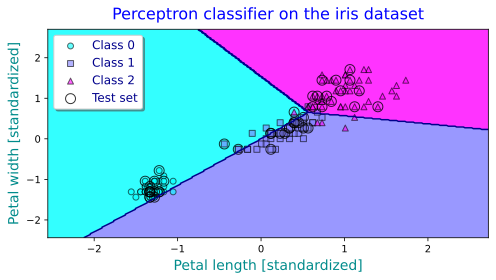

In [9]:
# 'np.vstack' means concatenate along the vertical axis
X_combined_std = np.vstack((X_train_std, X_test_std))
# in scikit-learn, labels are horizontal vectors...
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(7, 4))
plt.title("Perceptron classifier on the iris dataset", fontsize=16, color='blue', pad=10)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]', labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel('Petal width [standardized]', labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<a id="2"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>2. LOGISTIC REGRESSION</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2a. The logistic sigmoid function</font><a id="2a"></a></p>$\quad$
        Favoured by bookmakers in the United Kingdom and Ireland, and also common in horse racing, <font color='darkpink'>fractional odds</font> quote the net total that will be paid out to the bettor, should they win, provided they bet $1$. Odds of <font color='#cc33ff'>$\,5/1\,$</font> would imply that the bettor stands to make a <font color='#1aabff'>$500$</font> profit on a <font color='#1aabff'>$100$</font> stake. If the odds are <font color='#cc33ff'>$\,1/5\,$</font>, the bettor will make <font color='#1aabff'>$20$</font> on a <font color='#1aabff'>$100$</font> stake. In either case, having won, the bettor always receives the original stake back; so if the odds are <font color='#cc33ff'>$\,5/1\,$</font> the bettor receives a total of <font color='#1aabff'>$600$</font>. If the <font color='#cc33ff'>fractional odds</font> are denoted by <font color='#1aabff'>$\,fo\,$</font> and the bettor bets <font color='#1aabff'>$1$</font> and wins, he will make <font color='#1aabff'>$\,fo\,$</font> and receive <font color='#1aabff'>$\, \left(fo\!+\!1\right) \,$</font>; so if he plays <font color='#1aabff'>$\, \left(fo\!+\!1\right) \,$</font> times, loses <font color='#1aabff'>$\,fo\,$</font> times and wins once, then his net gain will be <font color='#1aabff'>$0$</font>. Hence, in a fair game, his probability of winning would be <font color='#1aabff'>$\, p=\frac{1}{fo+1} \,$</font>. Conversely, if <font color='#1aabff'>$p$</font> is the winning probability, then <font color='#1aabff'>$\, fo = \frac{1-p}{p} \,$</font>.<br>
    Fractional odds are the inverse of what is called <font color='darkpink'>odds</font> in probability theory :<div style="margin-top: 10px"></div><font color='purple'>
    $$\text{odds} \;:=\; \frac{p}{1-p} \qquad\quad (1)$$</font><div style="margin-top: 10px"></div>$\quad$
        The natural logarithm of the <font color='#cc33ff'>odds</font> is called the <font color='darkpink'>logit function</font> or, more concisely, the <font color='darkpink'>logit</font> :<div style="margin-top: 10px"></div><font color='purple'>
    $$\text{logit} :\; p \in \left]\,0\,; 1\right[ \;\;\mapsto \;\text{logit}(p) = \text{ln}\left(\frac{p}{1-p}\right) \in \mathbb{R} \qquad\quad (2)$$</font><div style="margin-top: 10px"></div>$\quad$
        The <font color='#cc33ff'>logit</font> is used in many fields. In machine learning it can be used to build a binary classifier which performs very well on linearly separable classes and is one of the most widely used algorithms for classification in industry, the <font color='darkpink'>logistic regression</font>. <font color='#cc33ff'>Logistic regression</font>, despite its name, is not a regression algorithm but a binary classification algorithm.<br>$\quad$
        Under the <font color='#cc33ff'>logistic regression</font> model, we assume that there is the same affine relationship between the feature values of any instance and the <font color='#cc33ff'>logit</font> of the probability that this instance belongs to the class $1$ : for any instance $\; x = \left( x_j \right)_{j=1}^{n}$, if $p$ is the probability that $x$ belongs to class $1$, we have<div style="margin-top: 10px"></div><font color='purple'>
    $$\text{logit}\,(p) \;=\; \sum_{j=1}^n \, w_{j} \, x_{j} \,+\, b \;=\; w.x \,+\, b \qquad\quad (3)$$<div style="margin-top: 10px"></div></font>
    where the <font color='darkpink'>weight vector</font> $\; w = \left( w_j \right)_{j=1}^{n}\;$ and the <font color='darkpink'>bias</font> $\, b \,$ do not depend on $x$. In order to predict the class of $x$ we will use the probability that it belongs to the class $1$, ie $p$.<br><br>$\quad$
        The inverse of the <font color='#cc33ff'>logit function</font> is called the <font color='darkpink'>(logistic) sigmoid function</font> :<div style="margin-top: 10px"></div><font color='darkpink'>
    $$\sigma : t \in \mathbb{R} \mapsto \sigma(t) = \frac{1}{1+e^{-t}} \qquad\quad (4)$$</font><div style="margin-top: 10px"></div>$\quad$
            Let's plot both functions (I use my own code instead of the code provided by the book, which only shows the graph of the sigmoid function, and my graphs are nicer) :

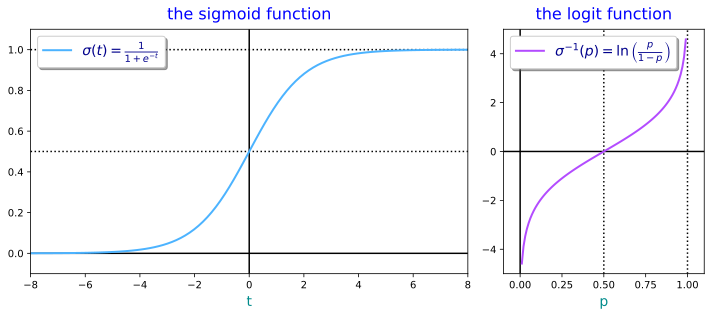

In [10]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def logit(p):
    return np.log(p/(1-p))

# linspace(start, stop, num=50, endpoint=True) returns 'num' evenly spaced points over [start, stop],
# including 'start' and, since 'endpoint'=True, 'stop'
t = np.linspace(-8, 8, 100)
sig = sigmoid(t)

p = np.linspace(0,1,100)[1:99]
x = logit(p)

plt.figure(figsize=(10, 4.5))
# plot the sigmoid function
plt.subplot2grid((2,3),(0,0), rowspan=2, colspan=2)
plt.title("the sigmoid function", fontsize=16, color='blue', pad=10)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([-8, 8], [0.5, 0.5], 'k:')
plt.plot([-8, 8], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, ls='-', lw=2, color=cmap(0.3), label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(fancybox=True, shadow=True, fontsize=14, labelcolor='darkblue')
plt.axis([-8, 8, -0.1, 1.1])

# plot the logit function
plt.subplot2grid((2,3),(0,2), rowspan=2)
plt.title("the logit function", fontsize=16, color='blue', pad=10)
plt.plot([-0.1,1.1], [0,0], 'k-')
plt.plot([0,0], [-5,5], 'k-')
plt.plot([.5,.5], [-5,5], 'k:')
plt.plot([1,1], [-5,5], 'k:')
plt.plot(p,x, ls='-', lw=2, color=cmap(0.7), label=r"$\sigma^{-1}(p) = \ln\left(\frac{p}{1-p}\right)$" )
plt.xlabel("p", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(fancybox=True, shadow=True, fontsize=14, labelcolor='darkblue')
plt.axis([-0.1, 1.1, -5, 5])

plt.tight_layout()
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2b. The logistic regression strategy</font><a id="2b"></a></p>$\quad$
        Like <font color='#cc33ff'>Adaline</font> (see previous part, "3. Adaline"), the <font color='#cc33ff'>logistic regression</font> model uses a cost function to obtain good weights (and a good bias); using $(3)$ and $(4)$ we will then be able to compute the probability that an instance $x$ belongs to the class $1$,<div style="margin-top: 10px"></div><font color='darkpink'>
    $$p \;=\; \sigma(w.x \,+\, b) \qquad\quad (5)$$</font><div style="margin-top: 10px"></div>
    and $x$ will be predicted to belong to the class $1$ iff $\; \sigma(w.x \,+\, b) \geq 0.5\,$, ie iff $\; w.x \,+\, b \geq 0 \,$. Note that the probability is interesting in itself; for example, it is used in weather forecast "not only to predict whether it will rain on a particular day, but also to report the chance of rain. Similarly, <font color='#cc33ff'>logistic regression</font> can be used to predict the chance that a patient has a particular disease given certain symptoms, which is why <font color='#cc33ff'>logistic regression</font> enjoys great popularity
in the field of medicine".<br>$\quad$
        Apart from the choice of the cost function (see next subchapter), the main difference between <font color='#cc33ff'>logistic regression</font> and <font color='#cc33ff'>Adaline</font> is that the activation function was the identity in <font color='#cc33ff'>Adaline</font>, and now it is the logistic sigmoid. Both strategies are summarized in the following diagram :

<figure style="text-align: center;">
    <img src="3.1. The logistic regression strategy.png" alt="Comparison between the Adaline and the logistic regression strategies. Adaline uses the MSE cost function on the net inputs and aims to minimize their total cost, while logistic regression applies the sigmoid function to these net inputs and aims to minimize the logistic loss (see next subchapter)." width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">The logistic regression strategy</figcaption>
</figure>

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2c. The logistic loss function</font><a id="2c"></a></p>$\quad$
        Now, in order to complete our <font color='#cc33ff'>logistic regression</font>, we need to find a good weight vector and a good bias. The idea of the <font color='#cc33ff'>logistic regression</font> is to use those which will maximize the likelihood that each instance $x^{(i)}$ of the training matrix would be predicted the right class $y^{(i)}$. There are only $2$ classes, $0$ and $1$, and we know that the probability that an instance $x$ belongs to the class $1$ will be given by $(5)$; hence, given $w$ and $b$, any instance will follow the Bernouilli distribution<div style="margin-top: 10px"></div><font color='purple'>
    $$P\left(x^{(i)} \text{ in class } y^{(i)} \,\big/\, w, b\right) \;=\; p_i^{y^{(i)}} \, \left(1-p_i\right)^{\left(1-y^{(i)}\right)} \qquad\quad (6)$$</font><div style="margin-top: 10px"></div>
    where <font color='purple'>$p_i \;=\; \sigma(w.x^{(i)} \,+\, b)$</font>. Assuming independance of the instances, the probability that all instances are predicted the correct classes is<div style="margin-top: 10px"></div><font color='purple'>
    $$P\left(X \text{ is predicted } y \,\big/\, w, b\right) \;=\; \prod_{i=1}^{m} \, p_i^{y^{(i)}} \, \left(1-p_i\right)^{\left(1-y^{(i)}\right)} \qquad\quad (7)$$</font><div style="margin-top: 10px"></div>$\quad$
        So $(7)$ is what we want to maximize. Maximizing $(7)$ is equivalent to maximizing its natural logarithm; or, equivalently, we are looking for the weight vector and the bias which minimize the <font color='darkpink'>logistic loss (function)</font><div style="margin-top: 10px"></div><font color='darkpink'>
    $$L\left(w, b\right) \;=\; -\, \frac{1}{m} \, \sum_{i=1}^{m} \, \left[ y^{(i)} \, \ln\left(\sigma(w.x^{(i)} \,+\, b)\right) + {\left(1-y^{(i)}\right)} \, \ln\left(1-\sigma(w.x^{(i)} \,+\, b)\right) \right] \qquad\quad (8)$$</font><div style="margin-top: 10px"></div>
    Note that the cost for a single instance $i$ would be<div style="margin-top: 10px"></div><font color='purple'>
    $$- \, \left[ y^{(i)} \, \ln\left(p_i\right) \,+\, {\left(1-y^{(i)}\right)} \ln\left(1-p_i\right) \right] \qquad\quad (9)$$</font><div style="margin-top: 10px"></div>
    so if $y^{(i)} = 1$ the cost is $\,\ln\left(p_i\right)$, while if $y^{(i)} = 0$ then it is $\,\ln\left(1-p_i\right)$. We see that in both cases, a wrong certainty would cost infinitely.<br><br><div style="margin-top: 10px"></div>
    <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p>$\quad$
        We will generalize the <font color='#cc33ff'>logistic loss function</font> to multiclass classification problems in part 7, "4a. The Gradient Boosting strategy", "Multiclass logistic loss function and related notations".

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2d. The Hessian of the logistic loss function</font><a id="2d"></a></p>$\quad$
        In this subchapter I show that the <font color='#cc33ff'>logistic loss function</font> is convex by showing that its Hessian is positive. In doing so I will compute its gradient, which will prove useful for the Gradient Descent methods if we want to code them instead of using <font color='#cc33ff'>scikit-learn</font>.<br>$\quad$
        I begin by using the same trick I used in the previous part (introduced in "1b. The perceptron algorithm"), which consists of adding the bias to the weight vector, as its $0$-th component, and adding a column of $1$ as the first column of the training matrix, so that the <font color='#cc33ff'>logistic loss function</font> can be written in a simpler form, as<div style="margin-top: 10px"></div><font color='darkpink'>
        $$L\left(w\right) \;=\; -\, \frac{1}{m} \, \sum_{k=0}^{m} \, \left[ y^{(k)} \, \ln\left(\sigma(w.x^{(k)} )\right) + {\left(1-y^{(k)}\right)} \, \ln\left(1-\sigma(w.x^{(k)})\right) \right] \qquad\quad (10)$$</font><div style="margin-top: 10px"></div>$\quad$
        Now<div style="margin-top: 10px"></div><font color='purple'>
        $$\nabla L\left(w\right) \;=\; -\, \frac{1}{m} \, \sum_{k=0}^{m} \, \left[ y^{(k)} \, \frac{\sigma'(w.x^{(k)})}{\sigma(w.x^{(k)})} + {\left(1-y^{(k)}\right)} \, \frac{-\sigma'(w.x^{(k)})}{1-\sigma(w.x^{(k)})} \right] (x^{(k)})^T \qquad\quad (11)$$</font><div style="margin-top: 10px"></div>$\quad$
        This can be simplified. Indeed $\, \forall t \in \mathbb{R}$<div style="margin-top: 10px"></div><font color='purple'>
        $$\sigma'(t) \;=\; \frac{e^{-t}}{\left(1+e^{-t}\right)^2} \;=\; \frac{1}{4\cosh\left(\frac{t}{2}\right)^2} \qquad\quad (12)$$</font><div style="margin-top: 10px"></div>
    so<div style="margin-top: 10px"></div><font color='purple'>
        $$\frac{\sigma'(t)}{1-\sigma(t)} \;=\; \frac{e^{-t}}{\left(1+e^{-t}\right)^2} \,\times\, \frac{\left(1+e^{-t}\right)}{e^{-t}} \;=\; \frac{1}{1+e^{-t}} \;=\; \sigma(t) \qquad\quad (13)$$</font><div style="margin-top: 10px"></div>
    and<div style="margin-top: 10px"></div><font color='purple'>
        $$\frac{\sigma'(t)}{\sigma(t)} + \frac{\sigma'(t)}{1-\sigma(t)} \;=\; \frac{e^{-t}}{\left(1+e^{-t}\right)^2} \, \left(1+e^{-t}\right) \,+\, \frac{1}{1+e^{-t}} \;=\; 1 \qquad\quad (14)$$</font><div style="margin-top: 10px"></div>$\quad$
        Consequently<div style="margin-top: 10px"></div><font color='darkpink'>
        $$\nabla L\left(w\right) \;=\; -\, \frac{1}{m} \, \sum_{k=0}^{m} \, \left[ y^{(k)} \,-\, \sigma(w.x^{(k)})\right] (x^{(k)})^T \qquad\quad (15)$$</font><div style="margin-top: 10px"></div>
    and<div style="margin-top: 10px"></div><font color='darkpink'>
        $$\nabla^2 L\left(w\right) \;=\; \frac{1}{m} \, \sum_{k=0}^{m} \, \frac{1}{4\cosh\left(\frac{w.x^{(k)}}{2}\right)^2} \; (x^{(k)})^T \; (x^{(k)}) \qquad\quad (16)$$</font><div style="margin-top: 10px"></div>
    so $\forall \xi \in \mathbb{R}^{n+1}$<div style="margin-top: 10px"></div><font color='darkpink'>
        $$\xi \,.\, \nabla^2 L\left(w\right) \xi \;=\; \frac{1}{m} \, \sum_{k=0}^{m} \, \left\lVert \frac{x^{(k)}.\xi}{2\cosh\left(\frac{w.x^{(k)}}{2}\right)} \right\rVert^2 \qquad\quad (17)$$</font><div style="margin-top: 10px"></div>$\quad$
        This proves that the Hessian of the <font color='#cc33ff'>logistic loss function</font> is positive; and that it is definite iff there is enough variety in the instances for the training matrix to be surjective. So the <font color='#cc33ff'>logistic loss function</font> has at most one minimum, that we can approach as close as needed with a Gradient Descent method, using $(15)$.<div style="margin-top: 10px"><br></div>
        <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p> $\quad$
    For more results relative to the <font color='#cc33ff'>logistic loss function</font>, and especially its generalisation to the multiclass problems, see part 7, "4a. The Gradient Boosting strategy", "Multiclass logistic loss function and related notations"

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2e. Logistic regression with the Batch Gradient Descent</font><a id="2e"></a></p>$\quad$
        The following code is given in the book. It codes the <font color='#cc33ff'>logistic regression</font> with a Batch Gradient Descent.

In [11]:
class LogisticRegressionGD:
    """Logistic regression classifier.
    
    Parameters
    ------------
    eta : the learning rate (a float between 0.0 and 1.0)
    n_iter : the number of passes over the training dataset (an int)
    random_state : a random number generator seed for random weight initialization (an int)
    
    Attributes
    -----------
    w_ : the weight vector (a 1d-array of floats)
    b_ : the bias (a float)
    losses_ : the MSE value at each epoch (a 1d array of floats)
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : the training matrix, of shape n_examples*n_features
        y : the target vector, of length n_examples
        Returns
        -------
        self : Instance of LogisticRegressionGD
        """
        # rgen = np.random.RandomState(self.random_state)
        # the modern way (according to chatGPT) is :
        rgen = np.random.default_rng(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # the logistic regression, contrary to Adaline, has an activation function, the sigmoid
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0])
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # 'np.clip(z, -250, 250)' limits the values in the array z to be within the range [−250,250].
        # Any values in z that are less than -250 are set to -250, and any values greater than 250 
        # are set to 250.
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's try our implementation of the <font color='#cc33ff'>logistic regression</font>. Since the logistic regression model is a binary classifier we restrict the <font color='#cc33ff'>Iris dataset</font> to only the setosa and the versicolor flowers.

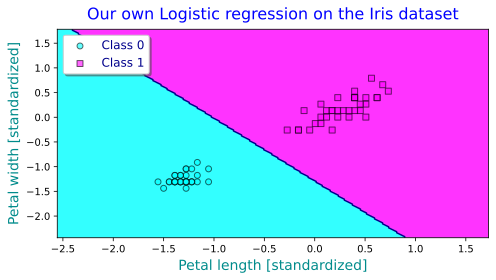

In [12]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plt.figure(figsize=(7, 4))
plt.title("Our own Logistic regression on the Iris dataset", fontsize=16, color='blue', pad=10)
# 'plot_decision_regions' is defined cell 8
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel("Petal length [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2f. Logistic regression with scikit-learn</font><a id="2f"></a></p>$\quad$
        Let's now use <font color='#cc33ff'>scikit-learn</font>'s <font color='#cc33ff'>LogisticRegression(penalty='l2', C=1.0, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', n_jobs=None, l1_ratio=None)</font> :<ul>
    <li><font color='#cc33ff'>penalty='l2'</font> adds an <font color='#cc33ff'>$L^2$-regularization</font> (see next subchapter for a first discussion of the topic). <font color='#cc33ff'>$L^2$-regularization</font> is available with any <font color='#cc33ff'>solver</font>. Other possible values are <font color='#cc33ff'>None</font> (ie no regularization is applied), which is not available if the <font color='#cc33ff'>'liblinear' solver</font> is used; and <font color='#cc33ff'>penalty='l1'</font>, which adds an <font color='#cc33ff'>$L^1$-regularization</font> (see next subchapter), and is only available with the <font color='#cc33ff'>'liblinear'</font> and <font color='#cc33ff'>'saga'</font> <font color='#cc33ff'>solvers</font>.</li>
    <li><font color='#cc33ff'>C=1.0</font> controls the regularization strength (see next subchapter).</li>
    <li><font color='#cc33ff'>random_state=None</font> is used to shuffle the data when the <font color='#cc33ff'>solver</font> is <font color='#cc33ff'>'liblinear'</font>, <font color='#cc33ff'>'sag'</font> or <font color='#cc33ff'>'saga'</font>.</li>
    <li><font color='#cc33ff'>solver='lbfgs'</font> specifies the algorithm to use in the optimization problem. <font color='#cc33ff'>scikit-learn</font> advises : "<font color='magenta'>$\;*\;$</font>for small datasets, <font color='#cc33ff'>'liblinear'</font> is a good choice, whereas <font color='#cc33ff'>'sag'</font> and <font color='#cc33ff'>'saga'</font> are faster for large ones;$\quad$ <font color='magenta'>$\;*\;$</font>for <font color='#cc33ff'>multiclass problems</font>, all <font color='#cc33ff'>solvers</font> except <font color='#cc33ff'>'liblinear'</font> minimize the full multinomial loss [also called the <font color='#cc33ff'>cross-entropy loss</font> (see part 12, "3c. The various steps for building an ANN", "Step 3")];$\quad$ <font color='magenta'>$\;*\;$</font><font color='#cc33ff'>'liblinear'</font> can only handle binary classification by default; to apply a one-versus-rest scheme one can wrap it with the <font color='#cc33ff'>OneVsRestClassifier</font> [like we did in "1b. Training the perceptron with scikit-learn"];$\quad$ <font color='magenta'>$\;*\;$</font><font color='#cc33ff'>'newton-cholesky'</font> is a good choice for <font color='#5555ff'>n_samples</font> $\gg$ <font color='#5555ff'>n_features</font> * <font color='#5555ff'>n_classes</font>, especially with one-hot encoded categorical features (see part 11, "2b. Implementing an MLP") with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on <font color='#5555ff'>n_features</font> * <font color='#5555ff'>n_classes</font> because it explicitly computes the full <font color='#cc33ff'>Hessian matrix</font>."</li>
    <li><font color='#cc33ff'>max_iter=100</font> specifies a maximum number of iterations to run</li>
    <li><font color='#cc33ff'>multi_class='deprecated'</font> : as explained above (in "1b. Training the perceptron with scikit-learn"), <font color='#cc33ff'>multi_class</font> is now deprecated, and I have replaced the numerous book's pieces of code that used it with the newer implementation</li></ul><div style="margin-top: 20px"></div>$\quad$
        S. Raschka (the book's author) chose to use the default optimization algorithm <font color='#cc33ff'>solver=</font><font color='#1aabff'>'lbfgs'</font>. Since <font color='#cc33ff'>scikit-learn</font> recommends <font color='#cc33ff'>'liblinear'</font> for small datasets, and since our dataset is small, I added a code snippet (below the cell containing the book's code) where <font color='#cc33ff'>'liblinear'</font> is the solver. The results are similar.<br>$\quad$
        The book also uses <font color='#cc33ff'>C=100.0</font> (ie a tiny regularization), and <font color='#cc33ff'>multi_class='ovr'</font>, that we update within the code :

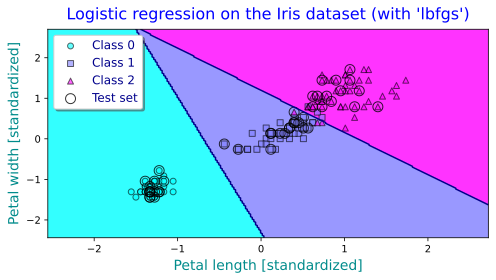

In [13]:
from sklearn.multiclass import OneVsRestClassifier  # Explicit wrapper for OvR
from sklearn.linear_model import LogisticRegression

# Initial code : lr_iris_1 = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
# Update : 1. Define the base binary classifier
base_classifier = LogisticRegression(C=100.0, solver='lbfgs')
# 2. Wrap it inside OneVsRestClassifier for multiclass classification with OvR
lr_iris_1 = OneVsRestClassifier(base_classifier)

lr_iris_1.fit(X_train_std, y_train)

plt.figure(figsize=(7, 4))
plt.title("Logistic regression on the Iris dataset (with 'lbfgs')", fontsize=16, color='blue', pad=10)
# 'X_combined_std' and 'y_combined' have been defined cell 9;
# 'test_idx' is the set of indices of the test dataset
plot_decision_regions(X_combined_std, y_combined, classifier=lr_iris_1, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

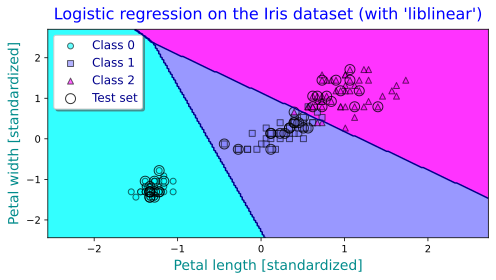

In [14]:
# 'C' is a regularization parameter, 'lbfgs' is an optimization algorithm, and 'ovr' is OvR
lr_iris_2 = OneVsRestClassifier(LogisticRegression(C=100.0, solver='liblinear'))
lr_iris_2.fit(X_train_std, y_train)

plt.figure(figsize=(7, 4))
plt.title("Logistic regression on the Iris dataset (with 'liblinear')", fontsize=16, color='blue', pad=10)
# 'X_combined_std' and 'y_combined' have been defined cell 9;
# 'test_idx' is the set of indices of the test dataset
plot_decision_regions(X_combined_std, y_combined, classifier=lr_iris_2, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The probability that training examples belong to a certain class can be computed using the <font color='#cc33ff'>predict_proba</font> method. For example, we can predict the probabilities of the first three examples in the test dataset as follows; the $n$-th row corresponds to the class membership probabilities of the $n$-th flower :

In [15]:
print(MB, lr_iris_2.predict_proba(X_test_std[:3, :]))

 [[3.17983737e-08 1.44886616e-01 8.55113353e-01]
 [8.33962295e-01 1.66037705e-01 4.55557009e-12]
 [8.48762934e-01 1.51237066e-01 4.63166788e-13]]


<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The predicted class will be the one with the highest probability; we can use the <font color='#cc33ff'>predict</font> method to directly get them ($2$ corresponds to <font color='#cc33ff'>Iris-virginica</font> and $0$ to <font color='#cc33ff'>Iris-setosa</font>) :

In [16]:
print(MB, lr_iris_2.predict(X_test_std[:3, :]))

 [2 0 0]


<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Lastly, a word of caution if you want to predict the class label of a single flower example : <font color='#cc33ff'>scikit-learn</font> expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy’s <font color='#cc33ff'>reshape</font> method to add a new dimension; for example if we want to transform the $i$-th row into a $2d$ array we can use <font color='#5555ff'>X_test_std$\,$[i, :].reshape(1, -1)</font>, where <font color='#cc33ff'>reshape(1, -1)</font> means that we want Numpy to reshape the row into a $2d$-array composed of $1$ row and a number of columns that should be inferred by Numpy.

In [17]:
print(MB, lr_iris_2.predict(X_test_std[1, :].reshape(1, -1)))

 [0]


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2g. Overfitting and regularization</font><a id="2g"></a></p>$\quad$
        Up to now, except in general presentations, we have only used two cost functions, the <font color='#cc33ff'>$MSE\,$</font> and the <font color='#cc33ff'>logistic loss</font>. We started with the net inputs (the affine transformations of the inputs involving the weights and the bias), and then computed the <font color='#cc33ff'>$MSE\,$</font> on them (considering that they were our predictions), or we computed the <font color='#cc33ff'>logistic loss</font> of their images via the sigmoid function. And then we used an optimization technique to try and find the weights and bias which optimize the cost.<br>$\quad$
        But, if there are not enough samples, an outlier will be comparatively costly, the weights and bias will be adapted to minimize its cost, so by fitting closely to the training data our model will not represent the general data well. In the long run, the outliers will be proportionately numbered (or outnumbered), so our cost function will be fine, but before that we risk <font color = darkpink>overfitting</font>, ie fitting too closely to instances that are not representative of the whole. The goal of regularization is to reduce this problem. By so doing we must take care to not regularize too much, or we risk <font color = darkpink>underfitting</font>, ie not being adapted well enough to our training data. <font color='#cc33ff'>Underfitting</font> and <font color='#cc33ff'>overfitting</font> are presented in the following diagram :

<figure style="text-align: center;">
    <img src="3.2. Underfitting and overfitting.png" alt="Examples showing two classes and what it means for an optimization algorithm to be underfitted, well-fitted and overfitted. The first diagram shows a straight line cutting through instances of both classes, separating them loosely. The second diagram shows a regular line separating both classes rather well, with only one instance on the wrong side of the line; this instance is an outlier, lying among the elements of the other class. And the third diagram shows a line separating both classes perfectly, but the line itself is wiggling too closely, and we can imagine that it won't separate further instances well, especially those near the outlier." width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">Examples of underfitted, well-fitted and overfitted models</figcaption>
</figure>

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Usually, we select the model that better fits the training data (eg the model which has the largest <font color='#cc33ff'>training accuracy</font>). The model represented on the third diagram above is the one that we would select; but it is likely that, by fitting the training data too closely, this model has damaged its ability to correctly classify new instances that would be close to the outlier(s) present in the  <font color='#cc33ff'>training dataset</font>, and that the model represented on the second diagram would, in fact, be the better model. In practice we would compare our models by keeping aside a part of our training data, called the <font color='darkpink'>validation data</font>, train our models on the remaining data, still referred to as the <font color='darkpink'>training data</font>, and compare our models on the <font color='#cc33ff'>validation data</font>; we will use <font color='#cc33ff'>validation data</font> from the next part on, but for now, let's present the most common technique used to alleviate <font color='#cc33ff'>overfitting</font>. The idea is, since our weights do too good a job, let's deteriorate them by adding to our <font color='#cc33ff'>cost function</font> a cost that has nothing to do with the problem at hand; we call this cost the <font color='darkpink'>regularization cost</font>. Of course, we do not wish to deteriorate our weights too much, so we multiply the <font color='#cc33ff'>regularization cost</font> by a factor, a parameter that we can tweak according to the results obtained on the <font color='#cc33ff'>validation set</font>.<br>$\quad$
        The <font color='#cc33ff'>regularization cost</font> will either be the $L^2$-norm of our weights (squared, so that it is differentiable); or their $L^1$-norm; or a linear combination of both (see a quick presentation of each possibility below). In any case, to be meaningful, <font color='magenta'>before regularizing the weights, we need our features to be on the same scale</font>. Indeed, say we have two identical datasets, except that dataset 2 has its $i$-th feature multiplied by $1000$ (eg it is expressed in meters rather than kilometers); then, before <font color='#cc33ff'>regularization</font>, the weights obtained for both datasets will be exactly the same, except that the $i$-th weight will be much larger in the first case ($1000$ times larger in a linear model). This implies that, when our regularized model will try to minimize its cost, it will look to minimize the $i$-th weight much more in the first case, although both datasets correspond to the same data. Therefore, before <font color='#cc33ff'>regularizing</font> our <font color='#cc33ff'>cost function</font>, we should make sure that our features are on the same scale; otherwise, we rescale them first (we will present <font color='#cc33ff'>rescaling</font> techniques in our next part, "3b. Bringing features onto the same scale", but, for now, simply <font color='#cc33ff'>standardize</font> the features, using the <font color='#cc33ff'>StandardScaler</font> class from <font color='#cc33ff'>scikit-learn</font>, as we did above).<br>$\quad$
        By adding the norm(s) of our weights to the <font color='#cc33ff'>cost function</font>, we ensure that the <font color='#cc33ff'>regularized weights</font> will have smaller norms than the <font color='#cc33ff'>non-regularized weights</font>, in fact as small a norm as we want (by augmenting the <font color='#cc33ff'>regularization parameter</font>). Using the <font color='#cc33ff'>$L^2$-regularization</font> allows us to have an exact solution for some <font color='#cc33ff'>cost functions</font>, including the <font color='#cc33ff'>$MSE\,$</font> (see below), thus simplifying computations; while using the $L^1$-regularization favors <font color='darkpink'>weight sparsity</font>, ie the most unimportant weights will become exactly $0$. These topics will be explored in our next part (in "4a. $L^1$ and $L^2$-regularizations"), but for now, let's summarize the <font color='#cc33ff'>regularization</font> strategy :<ol>
    <li><font color='darkpink'>Scale the features of the training set</font>, eg with <font color='#cc33ff'>standardization</font>, so they have equal importance</li>
    <li><font color='darkpink'>Add a cost for the weights</font> to our original cost for the errors :<br><font color='darkpink'>
        $$Lr(w) =  L(w) \; + \: \frac{\lambda}{m} \sum_{j=1}^n w_j^2 \; + \: \frac{\mu}{m} \sum_{j=1}^n \lvert w_j \rvert \quad ; \; \lambda , \mu \geq 0 \qquad\quad (18)$$</font></li></ol>
    <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Notes :</font></p><ul>
<li> here I use the usual trick of integrating the bias as the $0$-th component of the weight vector and a $1$ to the left of instances (including a column composed of $1$ to the left of the training matrix)</li>
<li> there is no cost added for the bias : it is not associated with any feature so regularizing it  would only interfere with the model's ability to correctly capture the global properties of the data</li></ul>$\quad$
        Let's present the three most used regularization methods :

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    <font color='purple'>$\blacksquare\;\,$</font><font size=4><font color='darkpink'>$L^2$-regularization</font></font>, also called <font color='darkpink'>Ridge regression</font> corresponds to <font color='purple'>$\;\lambda > 0 \;\text{ and }\; \mu = 0\;$</font> in $(18)$ :<div style="margin-top: 10px"></div>$\quad$
        This is the most common choice, and is the default <font color='#cc33ff'>penalty</font> in <font color='#cc33ff'>scikit-learn</font>, where it is explicitly chosen via $\,$<font color='#cc33ff'>penalty = </font><font color='#1aabff'>'l2'</font>$\,$. The value of the parameter <font color='#1aabff'>$\lambda$</font> is specified in a way that depends on the class that uses the <font color='#cc33ff'>Ridge regression</font>. For example, within <font color='#cc33ff'>SGDRegressor</font>, there is the parameter $\,$<font color='#cc33ff'>alpha = </font><font color='#1aabff'>$\alpha$</font>$\,$, which corresponds to <font color='#1aabff'>$\,\alpha = \frac{\lambda}{m}$</font>. Within <font color='#cc33ff'>LogisticRegression</font>, there is the parameter $\,$<font color='#cc33ff'>C = </font><font color='#1aabff'>$c$</font>$\,$, which corresponds to <font color='#1aabff'>$\,c = \frac{1}{\lambda}$</font>.<br>$\quad$
        The added cost is $C^{\infty}$ so, in the case of the original cost being the <font color='#cc33ff'>$MSE\,$</font> or the <font color='#cc33ff'>logistic loss</font>, the regularized cost is still $C^{\infty}$; moreover the hessian of the added cost is<div style="margin-top: 10px"></div><font color='purple'>
        $$\nabla^2 \left[ \frac{\lambda}{m} \sum_{j=1}^n w_j^2 \right] \;=\; \frac{2\lambda}{m} \, I_{o} \qquad\text{ where }\; I_{o} = \text{Diag}(0, 1, 1, \cdots, 1) \in \mathbb{R}^{(n+1)\times(n+1)} \qquad\quad (19)$$</font><div style="margin-top: 10px"></div>
    Consequently, in the case of the original cost being the <font color='#cc33ff'>$MSE\,$</font> or the <font color='#cc33ff'>logistic loss</font>, <font color='purple'>the Hessian of the regularized cost is positive</font> (as the sum of two positive matrices - see part 2, equation $(34)$, for the <font color='#cc33ff'>$MSE\,$</font>, and equation $(17)$ here for the <font color='#cc33ff'>logistic loss</font> -), <font color='purple'>and definite</font> since $\; I_{o} \,\xi \,=\, 0 \;$ implies $\; \xi_1, \cdots, \xi_n \,=\, 0\;$ and then $\; \nabla^2 L(w)\xi = 0\;$ implies $\,b=0\,$ (again, according to part 2, equation $(34)$, for the <font color='#cc33ff'>$MSE\,$</font>, and to equation $(17)$ (term $\,k=0$) here for the <font color='#cc33ff'>logistic loss</font>). Hence <font color='darkpink'>the regularized <font color='#cc33ff'>$MSE\,$</font> and the regularized <font color='#cc33ff'>logistic loss</font> have a unique minimum</font>.<br>$\quad$
        Moreover, in the case of the <font color='#cc33ff'>$MSE\,$</font>,<div style="margin-top: 10px"></div><font color='purple'>
        $$\nabla Lr(w) \;=\; \frac{2}{m} \, X^T \, (X \, w - y) \,+\, \frac{2 \lambda}{m} \, I_{o} \, w \qquad\quad (20)$$</font><div style="margin-top: 10px"></div>
so $\,\nabla Lr(w) = 0\,$</font> iff<div style="margin-top: 10px"></div>
        $$(X^T X \, + \, \lambda I_{o})w \;=\; X^T \, y \qquad\quad (21)$$</font><div style="margin-top: 10px"></div>$\quad$
Since $\, (X^T X \, + \, \lambda I_{o}) \,$ is positive definite it is invertible, and the <font color='#cc33ff'>$MSE\,$</font> has one unique minimum, which is always defined by the <font color='purple'>regularized normal equation</font> :<div style="margin-top: 10px"></div><font color='darkpink'>
        $$w_{min} \;=\; (X^T X \, + \, \lambda I_{o})^{-1} \, X^T \, y \qquad\quad (22)$$</font><div style="margin-top: 10px"></div>
    Hence another advantage of the $L^2$-regularization is that <font color='darkpink'>in the case of the <font color='#cc33ff'>$MSE\,$</font> the solution is explicitly known</font>.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    <font color='purple'>$\blacksquare\;\,$</font><font size=4><font color='darkpink'>$L^1$-regularization</font></font>, also called <font color='darkpink'>Lasso regression</font> corresponds to <font color='purple'>$\;\lambda = 0 \;\text{ and }\; \mu > 0\;$</font> in $(18)$ :<div style="margin-top: 10px"></div>$\quad$
    It corresponds to $\,$<font color='#cc33ff'>penalty = </font><font color='#1aabff'>'l1'</font>$\,$ in <font color='#cc33ff'>scikit-learn</font>. Similarly, the value of the parameter <font color='#1aabff'>$\mu$</font> is specified in a way that depends on the class that uses the <font color='#cc33ff'>Lasso regression</font>. For example, within <font color='#cc33ff'>SGDRegressor</font>, there is the parameter $\,$<font color='#cc33ff'>alpha = </font><font color='#1aabff'>$\alpha$</font>$\,$, which corresponds to <font color='#1aabff'>$\,\alpha = \frac{\mu}{m}$</font>. Within <font color='#cc33ff'>LogisticRegression</font>, there is the parameter $\,$<font color='#cc33ff'>C = </font><font color='#1aabff'>$c$</font>$\,$, which corresponds to <font color='#1aabff'>$\,c = \frac{1}{\mu}$</font>.<br>$\quad$
    It means Least Absolute Shrinkage and Selection Operator. In Ridge regression the components of $w$ are squared, so the least important are reduced even further, so in order to reduce the value of the regularizer it is more efficient to reduce $w$ largest components. In Lasso regression the components of $w$ are not squared, hence Lasso regression tends to eliminate $w$ small coefficients as much as the larger ones, and leads to <font color='darkpink'>sparse models</font> (models with many $0$). So $L^1$-regularization helps eliminate unimportant features. <br/>$\quad$
    Since absolute values are not differentiable there is no closed solution as there was with Ridge regression (equation (22)) ; but we define a pseudo-gradient for the added cost, to use with Gradient Descent methods :<div style="margin-top: 10px"></div><font color='purple'>
    $$g(w) \;=\; \frac{\mu}{m} \, \epsilon(w) \quad\text{ with }\;\; \epsilon(w) := (\epsilon(w_j))_{j=1}^n \;\text{ where }\; \epsilon(w_j) := \begin{cases} 1 & \text{if } w_j>0 \\ 0 & \text{if } w_j=0 \\ -1 & \text{if } w_j<0 \end{cases} \qquad\quad (23)$$

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    <font color='purple'>$\blacksquare\;\,$</font><font size=4><font color='darkpink'>Elastic net (regression)</font> is the general case <font color='purple'>$\;\lambda > 0 \;\text{ and }\; \mu > 0\;$</font> in $(18)$ :<div style="margin-top: 10px"></div>$\quad$
    It corresponds to $\,$<font color='#cc33ff'>penalty = </font><font color='#1aabff'>'elasticnet'</font>$\,$ in <font color='#cc33ff'>scikit-learn</font>. The value of the parameters <font color='#1aabff'>$\lambda$</font> and <font color='#1aabff'>$\mu$</font> is specified in a way that depends on the class that uses the <font color='#cc33ff'>Elastic Net regression</font>. For example, within <font color='#cc33ff'>SGDRegressor</font>, there are the parameters $\,$<font color='#cc33ff'>alpha = </font><font color='#1aabff'>$\alpha$</font>$\,$ and $\,$<font color='#cc33ff'>l1_ratio = </font><font color='#1aabff'>$\beta$</font>$\,$, which correspond to <font color='#1aabff'>$\,\alpha = \frac{\lambda + \mu}{m}$</font> and <font color='#1aabff'>$\,\beta = \frac{\mu}{\lambda + \mu}$</font>. Within <font color='#cc33ff'>LogisticRegression</font>, $\,$<font color='#cc33ff'>penalty = </font><font color='#1aabff'>'elasticnet'</font>$\,$ is available iff we use $\,$<font color='#cc33ff'>solver = </font><font color='#1aabff'>'saga'</font>$\,$, and then, we can use the parameters $\,$<font color='#cc33ff'>C = </font><font color='#1aabff'>$c$</font>$\,$ and $\,$<font color='#cc33ff'>l1_ratio = </font><font color='#1aabff'>$\beta$</font>$\,$, which correspond to <font color='#1aabff'>$\,c = \frac{m}{2\,(\lambda+\mu)}$</font> and <font color='#1aabff'>$\,\beta = \frac{\mu}{\lambda+\mu}$</font>.<br>$\quad$
    It is a mixture of the Ridge and the Lasso regressions, and is generally preferred over Lasso regression when dealing with more features than instances or with strongly correlated features because Lasso may behave erratically then. <br/>
    Because of its $l^1$ regularizer it has no rigorously defined gradient, nor closed solution for $w_{min}$ (like (22) for the Ridge regression). Its pseudo-gradient is obtained from the gradient of the Ridge and the pseudo-gradient of the Lasso, according to ChatGPT.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's show an example of the effect of the regularization's strength over the size of the weights.<br>
    In the code below, we use the <font color='#cc33ff'>LogisticRegression</font> algorithm of <font color='#cc33ff'>scikit-learn</font> with an $L^2$ penalty, and various values of <font color='#cc33ff'>C</font>. We see that when the regularization is strong the weights are almost $0$ (as expected), and when we decrease the importance of the $l^2$ term, they converge towards values a little beyond $2$ and $-2$.

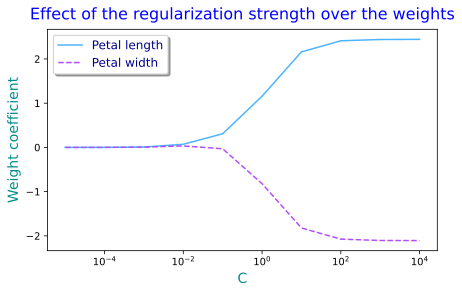

In [18]:
weights, params = [], []
for c in np.arange(-5, 5):
    # since there are three Iris classes, 'lr' uses three similar logistic regressions (one per class)
    lr = OneVsRestClassifier(LogisticRegression(C=10.**c))
    lr.fit(X_train_std, y_train)
    # since 'lr' is an instance of OneVsRestClassifier, 'lr.estimators_' is the list of the estimators
    # used by 'lr'; 'lr.estimators_[1]' is the second logistic regression (it predicts class 1 vs the rest);
    # '.coef_' is its weight, given as a (1*n_features) NumPy array; so 'lr.estimators_[1].coef_[0]' contains
    # the learned weights for the second estimator
    weights.append(lr.estimators_[1].coef_[0])
    params.append(10.**c)

weights = np.array(weights)

plt.figure(figsize=(7, 4))
plt.title("Effect of the regularization strength over the weights", fontsize=16, color='blue', pad=10)
# 'weights[:, 0]' contains the first weight component for class 1, across different regularization strengths
plt.plot(params, weights[:, 0], color=cmap(0.3), label="Petal length")
plt.plot(params, weights[:, 1], linestyle='--', color=cmap(0.7), label="Petal width")
plt.xlabel("C", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Weight coefficient", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.xscale('log')
plt.show()

<a id="3"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>3. SUPPORT VECTOR MACHINES</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3a. Linear SVM Classification. The hard margin case</font><a id="3a"></a></p>$\quad$
        The goal of a linear SVM classification is to linearly separate two classes ; in the hard margin case these classes need to be linearly separable.<br/>
    The number of straight lines that can separate two linearly separable classes is infinite. However, there is only one that has the largest possible margin, i.e. the greatest distance between itself and the two classes. Linear SVM classification aims to identify and return this particular straight line, hoping that if new data deviates slightly from the known members of its class it will still be correctly predicted.<br/>
    Let's visualize the idea on a diagram :

<figure style="text-align: center;">
    <img src="3.3. Decision boundary of a SVM.png" alt="Diagram showing two linearly separable classes and the decision boundary of an SVM. The first diagram shows three separating lines; they pass very close to some datapoints, suggesting that another datapoint of the same class might appear on the wrong side of the line. The line which minimizes the risk is the line which is the farthest from both class instances; it is called the 'decision boundary'. The decision boundary is shown in the second diagram, together with the one parallel line passing by one element of the first class and the symmetrical parallel line passing by two elements of the other class." width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">SVM maximizes the margin between the decision boundary and the training data points</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        As already mentioned, the hard margin case needs two separable classes. Contrary to what was done in the linear classification and regression cases, these classes are here denoted by $-1$ and $1$, instead of $0$ and $1$. Also we will not integrate the bias as the $0$-th component of the weight vector, neither add a $1$ in front of instances. This is because our tool of choice will be the separating hyperplanes, and hyperplanes naturally have two parameters, $w \in \mathbb{R}^n$ and $b \in \mathbb{R}$.<br>$\quad$
        For any such $w$ and $b$, let's denote<div style="margin-top: 10px"></div><font color='darkpink'>
    $$H\left(w,b\right) \;=\; \left\{ x\in\mathbb{R}^n \,,\; w.x + b \,=\, 0 \right\} \qquad\quad (24)$$</font><div style="margin-top: 10px"></div>$\quad$
        Note that<div style="margin-top: 10px"></div><font color='purple'>
    $$\forall c \in \mathbb{R}^* \quad H(cw,cb) \;=\; H(w,b) \qquad\quad (25)$$</font><div style="margin-top: 10px"></div>
    so $w$ can be any vector perpendicular to $H(w,b)$; it is, indeed, perpendicular to $H(w,b)$ since<div style="margin-top: 10px"></div>
    $$\forall x_A, x_B \in H(w,b) \quad w.(x_A-x_B) = w.x_A - w.x_B = -b -(-b) = 0 \qquad\quad (26)$$<div style="margin-top: 10px"></div>$\quad$
        Now, consider any hyperplane $H(w,b)$ and any point $x$ in $\mathbb{R}^n$, and let's denote by $x_{\perp}$ the orthogonal projection of $x$ onto $H$. $\left(x-x_{\perp}\right)$ is colinear with $w$ and $x_{\perp} \in H$ so<div style="margin-top: 10px"></div><font color='purple'>
    $$x-x_{\perp} \;=\; \left(\frac{w}{\left\lVert w \right\rVert} \,,\, x-x_{\perp}\right) \, \frac{w}{\left\lVert w \right\rVert} \;=\; \frac{w.x+b}{\left\lVert w \right\rVert^2} \, w \qquad\quad (27)$$</font><div style="margin-top: 10px"></div>
    Hence the distance between $x$ and $H$ is<div style="margin-top: 10px"></div><font color='darkpink'>
    $$\text{dist}\left(x,H\right) \;=\; \left\lVert x-x_{\perp} \right\rVert \;=\; \frac{\left\lvert w.x+b \right\rvert}{\left\lVert w \right\rVert} \qquad\quad (28)$$</font><div style="margin-top: 10px"></div>$\quad$
        Coming back to our problem at hand, we know by hypothesis that the classes are linearly separable, ie there are hyperplanes $H(w,b)$ located between the training points of class $-1$ and those of class $1$; by multiplying $w$ and $b$ by $-1$ if necessary, this means the following relations between the training points and these hyperplanes :<div style="margin-top: 10px"></div><font color='purple'>
    $$y^{(i)} = 1 \;\text{ iff }\; w.x^{(i)}+b > 0 \quad\text{ and }\quad y^{(i)} = -1 \;\text{ iff }\; w.x^{(i)}+b < 0 \qquad\quad (29)$$</font>$\quad$
        $(29)$ can be written more simply in a single equation<div style="margin-top: 10px"></div><font color='purple'>
    $$\forall i \in \left\{1, \cdots, m\right\} \quad y^{(i)} \times \left(w.x^{(i)}+b\right) > 0 \qquad\quad (30)$$</font><div style="margin-top: 10px"></div>$\quad$
        Let's define<div style="margin-top: 10px"></div><font color='purple'>
    $$\delta:\; \mathbb{R}^{n}\times\mathbb{R} \to \mathbb{R} \;\;/\;\; (w,b) \mapsto \frac{1}{\left\lVert w \right\rVert} \times \min_{\substack{i=1,\cdots, m}}\; y^{(i)} \times \left(w.x^{(i)}+b\right) \qquad\quad (31)$$</font><div style="margin-top: 10px"></div>$\quad$
        Since there is a finite number of training points, a hyperplane $H(w,b)$ separates both classes (and is well oriented) iff $\delta(w, b) > 0$. Moreover, in this case, according to $(28)$, $(30)$ and the fact that $y^{(i)} = \pm1$, the minimal distance between $H(w,b)$ and the training points is precisely $\delta(w,b)$. So what we are trying to do in the hard margin case of the SVM algorithm is to try and maximize $\delta$.<br>$\quad$
        According to $(25)$, $H(w,b) = H\left(\frac{w}{min}, \frac{b}{min}\right)$ where $min := \min_{\substack{i=1,\cdots, m}}\; y^{(i)} \times \left(w.x^{(i)}+b\right)$, so, denoting by $\mathcal{E}$ the set of all the training points and only considering the hyperplanes that pass between the two classes of datapoints,<div style="margin-top: 10px"></div>
    $$\underset{w,b}{\text{argmax}}\,\big\{\text{dist}(H(w,b), \mathcal{E}); \;\, w \in \mathbb{R}^{n*}, \, b \in \mathbb{R}\big\} \;\;=\;\; \underset{w,b}{\text{argmax}}\,\left\{\text{dist}\left(H\left(\frac{w}{min},\frac{b}{min}\right), \mathcal{E}\right); \;\, w \in \mathbb{R}^{n*}, \, b \in \mathbb{R}\right\} \qquad\quad (32)$$<div style="margin-top: 10px"></div>
    Moreover<div style="margin-top: 10px"></div>
    $$\left\{\text{dist}\left(H\left(\frac{w}{min},\frac{b}{min}\right), \mathcal{E}\right); \;\, w \in \mathbb{R}^{n*}, \, b \in \mathbb{R}\right\} \;\;=\;\; \big\{\text{dist}\left(H(w,b), \mathcal{E}\right); \;\, w \in \mathbb{R}^{n*}, \, b \in \mathbb{R} \;\text{ st } min = 1 \big\} \qquad\quad (33)$$<div style="margin-top: 10px"></div>
    But for any $(w,b)$ in the last set we have<div style="margin-top: 10px"></div>
    $$\text{dist}\left(H(w,b), \mathcal{E}\right) \;=\; \delta(w,b) \;=\; \frac{1}{\lVert w \rVert} \qquad\quad (34)$$<div style="margin-top: 10px"></div>
    so the problem is equivalent to try and find among the hyperplanes $H(w,b)$ such that $\,min = 1$ the one with the largest possible $\frac{1}{\lVert w \rVert}$, or, equivalently, the smallest $\frac{1}{2} \lVert w \rVert^2$.<br>
    Note that $min=1$ is arbitrary : by multiplying by $\frac{c}{min}$ instead of $\frac{1}{min}$ for any $c>0$ we would have obtained the equivalent problem : try and find among the hyperplanes $H(w,b)$ such that $\,min = c$ the one with the largest possible $\frac{1}{\lVert w \rVert}$, or, equivalently, the smallest $\frac{1}{2} \lVert w \rVert^2$. The solution $H(w,b)$ does not depend on $c$, it is the same for all the $c>0$.<br>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Consider a hyperplane $H(w_0,b_0)$ with $min=1$ which passes between the two classes of points. It is not necessarily the hyperplane $H(w,b)$ with $min=1$ which maximizes $\frac{1}{\lVert w \rVert}$; but it can help us in restricting the hyperplanes that we need to consider : for our problem we only need to consider the hyperplanes $H(w,b)$ with $min=1$ such that $\frac{1}{\lVert w \rVert} \geq \frac{1}{\lVert w_0 \rVert}$ or, equivalently, such that $\lVert w \rVert \leq \lVert w_0 \rVert$.<br>$\quad$
        Moreover, since there are points in both classes, let's consider one point in class $1$, say $s$, and another in class $-1$, say $t$. For any hyperplane $H(w,b)$ that we consider, since its $min$ is $1$, we have $w.s+b \geq 1$ and $-(w.t+b) \geq 1$, so $1-w.s \leq b \leq -1-w.t$.<br>$\quad$
        Now, consider the function $(w,b) \in \mathbb{R}^{n*}\times\mathbb{R} \mapsto \frac{1}{\lVert w \rVert}$. It is continuous, so it reaches its bounds on the compact<div style="margin-top: 10px"></div>
        $$K = \big\{(w,b) \in \mathbb{R}^{n*} \times \mathbb{R}\;\text{ st } min=1 \big\} \cap B\left(0,\lVert w_0 \rVert\right) \times \left[1-w.s,-1-w.t\right] \qquad\quad (35)$$<div style="margin-top: 10px"></div>
    where $B\left(0,\lVert w_0 \rVert\right)$ is the closed ball of center $0$ and radius $\lVert w_0 \rVert$. $K$ is compact as a closed and bounded subset of a finite dimensional space. So there exists at least one point $(w_M,b_M)$ with $min=1$ which maximizes $\frac{1}{\lVert w \rVert}$, or, equivalently, which minimizes $\frac{1}{2} \lVert w \rVert^2$.<br>$\quad$
        As already mentioned $H(w_M,b_M)$ is also a solution of : try and find among the hyperplanes $H(w,b)$ such that $\,min = c$ the one with the largest possible $\frac{1}{\lVert w \rVert}$, or, equivalently, the smallest $\frac{1}{2} \lVert w \rVert^2$.<br>
    Consequently, it is also a solution of the optimization problem :<div style="margin-top: 10px"></div><font color='darkpink'>
    $$\begin{cases} & \text{minimize}_{\substack{w,b}} \; \; \frac{1}{2} \lVert w \rVert^2 \\\\ \text{ subject to } & \forall i=1,\cdots, m \quad y^{(i)} \times \left(w.x^{(i)}+b\right) \;\geq\; 1 \end{cases} \qquad\quad (36)$$</font><div style="margin-top: 10px"></div>$\quad$
        Indeed, since our condition $min=1$ is slightly more restrictive, $\frac{1}{2} \lVert w_M \rVert^2$ is greater than or equal to the minimum of $(36)$. But if $(36)$ had a solution $(w',b')$ with a strictly smaller $\frac{1}{2} \lVert w' \rVert^2$ such a solution would have a $min=c>1$; but we know that among the hyperplanes $H(w,b)$ with a $min=c$, $H(w_M,b_M)$ is one with the minimal $\frac{1}{2} \lVert w \rVert^2$, hence a contradiction.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The resolution of $(36)$ is quite complex. I will merely give a sketch of the idea because, in practice, we'd rather use an algorithm at this stage (eg the Sequential Minimal Optimization - SMO - algorithm, as in <font color='#cc33ff'>scikit-learn</font>).<br>$\quad$
        First, the cost of our problem is<div style="margin-top: 10px"></div><font color='purple'>
        $$J(w) \;=\; \frac{1}{2} \lVert w \rVert^2 \qquad\quad (37)$$</font><div style="margin-top: 10px"></div>$\quad$
        Second, we rewrite the constraints of our problem using the functions<div style="margin-top: 10px"></div><font color='purple'>
        $$\forall \, i = 1,\cdots,m \quad g_i(b,w) := 1 - \, y^{(i)}.\left(w . x^{(i)} + b\right) \qquad\quad (38)$$</font><div style="margin-top: 10px"></div>
    so the Lagrangian associated with $(36)$ is<div style="margin-top: 10px"></div><font color='purple'>
        $$\mathcal{L}\left(b,w,\lambda\right) = J(w) + \sum_{i=1}^m \lambda_i \, g_i(b,w) \qquad\quad (39)$$</font><div style="margin-top: 10px"></div>$\quad$
        Since<div style="margin-top: 10px"></div><font color='purple'>
        $$\nabla^{\,2}_{(b,w)} \, \mathcal{L}\left(b,w,\lambda\right) = \text{Diag}(0,1,1,\cdots,1) \qquad\quad (40)$$</font><div style="margin-top: 10px"></div>
    is positive, $\left(\hat{b}, \hat{w}\right)$ is a solution of $(36)$ iff<div style="margin-top: 10px"></div><font color='purple'>
        $$\text{i) } \exists \, \hat{\lambda} \in \mathbb{R}^m \;\; \nabla_{(b,w)} \, \mathcal{L}\left(\hat{b},\hat{w},\hat{\lambda}\right) = 0 \;\;\text{ and ii) }\; \forall i=1,\cdots,m \quad \hat{\lambda}_i \geq 0 \, , \; g_i(\hat{b},\hat{w}) \leq 0 , \text{ and }\; \hat{\lambda}_i . g_i(\hat{b},\hat{w}) = 0 \qquad\quad (41)$$</font><div style="margin-top: 10px"></div>$\quad$
        In particular, $\;\forall i = 1, \cdots, m\;\;$ if $\;\hat{\lambda}_i \neq 0\;$ then $\;g_i(\hat{b},\hat{w}) = 0\;$ ie $\;\hat{b} = y^{(i)} - \hat{w}.x^{(i)}\;$ - since $\left(y^{(i)}\right)^2 = 1$ -. In practice, in order to regularize its value we will rather use the mean of these values :<div style="margin-top: 10px"></div><font color='darkpink'>
        $$\hat{b} \;=\; \text{mean}\left(\left\{y^{(i)} - \hat{w}.x^{(i)},\;\; i \text{ such that } \hat{\lambda}_i > 0 \right\}\right) \qquad\quad (42)$$</font><div style="margin-top: 10px"></div>$\quad$
        Moreover, since<div style="margin-top: 10px"></div><font color='purple'>
        $$\nabla_b\, \mathcal{L}(b,w,\lambda) = 0 \iff \sum_{i=1}^m y^{(i)} \, \lambda_i = 0 \quad\text{and }\; \nabla_w\, \mathcal{L}(b,w,\lambda) = 0 \iff w = \sum_{i=1}^m y^{(i)} \, \lambda_i \, x^{(i)} \qquad\quad (43)$$</font><div style="margin-top: 10px"></div>
    we will know $\hat{w}$ (hence $\hat{b}$) as soon as we will know the $\hat{\lambda}_i$ :<div style="margin-top: 10px"></div><font color='darkpink'>
        $$\hat{w} \;=\; \sum_{i=1}^m y^{(i)} \; \hat{\lambda}_i \, x^{(i)} \qquad\quad (44)$$</font><div style="margin-top: 10px"></div>$\quad$
        According to S. Theodoridis in "Machine learning", Appendix C, p. 1023, the $\hat{\lambda}_i$ are also the solutions of the following <font color='purple'>dual problem</font> :<div style="margin-top: 10px"></div><font color='purple'>
        $$\begin{cases} \text{maximize}_{\substack{\lambda}} \; \; -\frac{1}{2} \sum_{i,j=1}^m y^{(i)} \, y^{(j)} \, \left(x^{(i)} . x^{(j)}\right) \, \lambda_i \, \lambda_j \, + \, \sum_{i=1}^m \lambda_i \\\\ \text{ subject to } \forall i=1,\cdots,m \quad \lambda_i \geq 0 \quad\text{ and}\quad \sum_{i=1}^m \, y^{(i)} \, \lambda_i = 0 \end{cases} \qquad\quad (45)$$</font><div style="margin-top: 10px"></div>
    Once we have solved $(45)$ we can get $\hat{w}$ using $(44)$ and then $\hat{b}$ using $(42)$.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3b. Linear SVM Classification. The soft margin case</font><a id="3b"></a></p>$\quad$
        The constraints in the hard margin SVM are quite restrictive : if there is an outlier among the elements of the other class, then the method can not be applied (there are no hyperplanes separating both classes); and if there is an outlier very close to the other class then choosing a separating hyperplane may not be the ideal solution. In other words, outliers are given too much importance.<br>$\quad$
        The idea behind the soft margin SVM is to release these constraints : instead of asking for all the training points to be at a respectable distance from the hyperplane (via $\forall i=1,\cdots, m \quad y^{(i)} \times \left(w.x^{(i)}+b\right) \;\geq\; 1$) we will try and solve the optimization problem<div style="margin-top: 10px"></div><font color='darkpink'>    
    $$\begin{cases} \text{minimize}_{w,b,\zeta} \; \; & \frac{1}{2} \lVert w \rVert^2 + C\times\sum_{i=1}^m \zeta_i \\\\ \text{ subject to } & \forall \, i = 1,\cdots,m \quad y^{(i)}.\left(w.x^{(i)}+b\right) \geq 1 - \zeta_i \\ \qquad \text{ and } & \forall \, i = 1,\cdots,m \quad \zeta_i \geq 0 \end{cases} \qquad\quad (46)$$</font><div style="margin-top: 10px"></div>
    where the $\zeta_i$, called the <font color='purple'>slack variables</font>, represent the margin of tolerance, and <font color='#cc33ff'>C</font> is a hyperparameter which balances the trade-off between achieving a wider margin and minimizing classification errors.<br>$\quad$
        In order to try and solve this optimization problem we can follow a similar path to the one presented in the hard margin case. We would find that<div style="margin-top: 10px"></div><font color='darkpink'>
    $$\hat{w} \;=\; \sum_{i=1}^m y^{(i)} \; \hat{\lambda}_i \, x^{(i)} \qquad\quad (47)$$</font><div style="margin-top: 10px"></div>
    and<div style="margin-top: 10px"></div><font color='darkpink'>
    $$\hat{b} \;=\; \text{mean}\left(\left\{y^{(i)} - \hat{w}.x^{(i)},\;\; i \,\text{ such that }\; 0 < \hat{\lambda}_i < C \right\}\right) \qquad\quad (48)$$</font><div style="margin-top: 10px"></div>
    <font color='magenta'>(recall that, in fact, all the values of the set in $(48)$ are equal, and we are computing the mean only to regularize any potential computation inaccuracy)</font><br>
    where the $\hat{\lambda}_i$ are the solutions of<div style="margin-top: 10px"></div><font color='purple'>
        $$\begin{cases} \text{maximize}_{\substack{\lambda}} \; \; & -\frac{1}{2} \sum_{i,j=1}^m y^{(i)} \, y^{(j)} \, \left(x^{(i)} . x^{(j)}\right) \, \lambda_i \, \lambda_j \, + \, \sum_{i=1}^m \lambda_i \\\\ \text{ subject to } & \forall i=1,\cdots,m \quad 0 \leq \lambda_i \leq C \quad\text{ and}\quad \sum_{i=1}^m \, y^{(i)} \, \lambda_i = 0 \end{cases} \qquad\quad (49)$$</font>

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3c. Examples of soft margin linear classification (hyperplane and polynomial decision boundaries)</font><a id="3c"></a></p>$\quad$
        Here, I provide an example of classification with three classes, where the decision boundaries are hyperplanes. This example comes from the book. And then, I'll present a second example featuring a polynomial decision boundary, which is adapted from "Hands-On Machine Learning" by A. Géron.

Test accuracy for the Linear SVM on the Iris dataset :  0.9777777777777777 



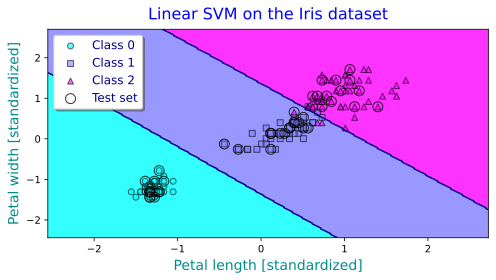

In [19]:
from sklearn.svm import SVC
# SVC (for Support Vector Classification) is a subclass of 'svm' (the whole class' name is
# 'sklearn.svm.SVC')
# by default, 'SVC' uses the OvR method to deal with multiple classes
# as before C, a float with default=1.0, is a regularization parameter which is inversely proportional
# to the strength of the regularization
lsvm_iris = SVC(kernel='linear', C=1.0, random_state=1)
lsvm_iris.fit(X_train_std, y_train)
y_pred_lsvm_iris = lsvm_iris.predict(X_test_std)
# print the test accuracy for the Linear SVM on the Iris dataset
print(BB + "Test accuracy for the Linear SVM on the Iris dataset : " + MB,
      accuracy_score(y_test, y_pred_lsvm_iris), "\n")

plt.figure(figsize=(7, 4))
plt.title("Linear SVM on the Iris dataset", fontsize=16, color='blue', pad=10)
plot_decision_regions(X_combined_std, y_combined, classifier=lsvm_iris, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$<font color='purple'>
        Sometimes we believe that the two classes of a data set should be separated by a polynomial function of a certain degree (for example by looking at the disposition of the data points on a $2d$ or $3d$ diagram). We can then use similar ideas as in our previous part ("2f. Polynomial regression") to separate the two classes : add to the training matrix the columns corresponding to the monomials of the polynomial function, and then use a linear method (eg a linear SVM) to separate the data points.</font><br>$\quad$
        For example the following diagram (from the book, wrongly illustrating the polynomial SVM method) represents two classes of data points, which seem to be grouped in two separated rings, one inside the other. Obviously, they are not separable with a hyperplane, but if we add a column corresponding to the (square of the) distances from a point to the center of the rings (here $0$), then they will be. So the map $\phi$ on the diagram is defined by $\;\phi(x_1,x_2) = (x_1,x_2,x_{1}^{2} + x_{2}^{2})\,$, and we would add the column $\;(X_1)^2 + (X_2)^2\;$ to the training matrix and use a linear method to separate the training points.

<figure style="text-align: center;">
    <img src="3.4. Composition of a polynomial and a linear classification method.png" alt="Diagram showing two classes of data points, disposed along rings, one inside the other; then the addition of a dimension corresponding to the square of the distances from the points to the center of the rings; we obtain a 3d figure where the points can now be separated by a hyperplane; if we go back to the original plane, the hyperplane is transformed into a circle separating both classes" width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">Composition of a polynomial and a linear classification method</figcaption>
</figure>

<br><br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        In order to try this method, we create a dataset using the <font color='#cc33ff'>make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)</font> function from <font color='#cc33ff'>scikit-learn</font>'s <font color='#cc33ff'>datasets</font> module. It generates 2D points forming two horizontal "moons" with noise (see the illustration in the next cell). It has the following parameters :<ul>
    <li><font color='#cc33ff'>n_samples=100</font> : the number of points to generate; either an integer specifying the total number of points, or a couple of integers specifying the number of points in each moon</li>
    <li><font color='#cc33ff'>shuffle=True</font> : whether to shuffle the samples</li>
    <li><font color='#cc33ff'>noise=None</font> : the standard deviation of the Gaussian noise added to the data; typically a float between $0.1$ and $0.3$</li>
    <li><font color='#cc33ff'>random_state=None</font> : the seed of the random number generator used to shuffle the samples and generate the noise (specifying a seed ensures reproducibility, which is useful to describe our results)</li></ul><div style="margin-top: 20px"></div>$\quad$
        First, we create the dataset and its target, then we split them into training and test sets, and finally we plot the data points :

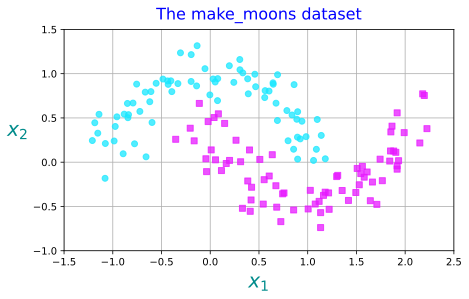

In [20]:
from sklearn.datasets import make_moons
# 'noise' specifies the standard deviation of Gaussian noise added to the data
Xm, ym = make_moons(n_samples=150, noise=0.15, random_state=42)
# shuffles the instances before splitting, using 70% of them for training
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, train_size=.7, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(Xm[:, 0][ym==0], Xm[:, 1][ym==0], "o", color=cmap(0.1), alpha=0.75)
    plt.plot(Xm[:, 0][ym==1], Xm[:, 1][ym==1], "s", color=cmap(0.9), alpha=0.75)
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$", labelpad=5, fontsize=20, color='darkcyan')
    plt.ylabel("$x_2$", labelpad=15, rotation=0, fontsize=20, color='darkcyan')

plt.figure(figsize=(7, 4))
plt.title("The make_moons dataset", fontsize=16, color='blue', pad=10)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        It seems that the points could be separated by a polynomial function of degree $3$. So the first step is to use <font color='#cc33ff'>PolynomialFeatures(degree=3)</font>, which adds all the columns that can be built from powers of all the initial columns of the training matrix up to the degree 3, then use <font color='#cc33ff'>StandardScaler()</font> in order to prepare the data by standardizing it, and at last use a linear classification model of our choice (here <font color='#cc33ff'>LinearSVC()</font> is used).<br>
    We can use <font color='#cc33ff'>Pipeline()</font> to chain transformations before using our estimator :

Test accuracy for the Linear SVM on the make_moons dataset :  0.9555555555555556 



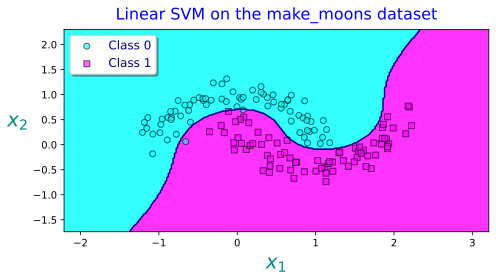

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

# define and train the classifier
poly_lsvm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=30, max_iter=10000, dual='auto', random_state=42))])
poly_lsvm_clf.fit(Xm_train, ym_train)
ym_pred_lsvm = poly_lsvm_clf.predict(Xm_test)
# print the test accuracy for the Linear SVM on the make_moons dataset
print(BB + "Test accuracy for the Linear SVM on the make_moons dataset : " + MB,
      accuracy_score(ym_test, ym_pred_lsvm), "\n")

plt.figure(figsize=(7, 4))
plt.title("Linear SVM on the make_moons dataset", fontsize=16, color='blue', pad=10)
# 'plot_decision_regions' is defined cell 8
plot_decision_regions(Xm, ym, classifier=poly_lsvm_clf)
plt.xlabel("$x_1$", labelpad=5, fontsize=20, color='darkcyan')
plt.ylabel("$x_2$", labelpad=15, rotation=0, fontsize=20, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3d. Positive definite kernels and RKHS</font><a id="3d"></a></p>$\quad$
        Let <font color='#1aabff'>$\Omega$</font> be a subset of <font color='#1aabff'>$\mathbb{R}^d$</font> (with <font color='#1aabff'>$d \in \mathbb{N}^*$</font>). A function <font color='#1aabff'>$\, K: \Omega \times \Omega \to \mathbb{R} \,$</font> is said to be a <font color='darkpink'>positive definite kernel</font> iff it is <font color='#cc33ff'>symmetric</font> (ie <font color='#1aabff'>$\; \forall x,y \in \Omega \;\; K(x,y) = K(y,x)\,$</font>), and it satisfies<div style="margin-top: 10px"></div><font color='darkpink'>
        $$\forall n \in \mathbb{N}^* \quad \forall x_1,\cdots,x_n \in \Omega \quad \forall c_1,\cdots,c_n \in \mathbb{R} \qquad \sum_{i,j=1}^n c_i.c_j.K(x_i,x_j) \geq 0 \qquad\quad (50)$$<div style="margin-top: 10px"></div>
    with equality iff $\;\;\forall y \in \Omega \;\; \sum_{i=1}^n c_i.K(x_i,y) \;=\; 0$</font>

<div style="margin-top: 20px"></div><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <font color='purple'>$\blacksquare\;\,$</font><font size=4><strong><font color='darkpink'>Some constructions of positive definite kernels</font></strong></font><ol>
    <li>if <font color='#1aabff'>$K$</font> is a <font color='#cc33ff'>positive definite kernel</font>, then <font color='#1aabff'>$\; \forall r \in \mathbb{R}_+ \;\; (K\!+\!r) \;$</font> and <font color='#1aabff'>$\; (r.K) \;$</font> are <font color='#cc33ff'>positive definite kernels</font><div style="margin-top: 10px"></div></li>
    <li>if <font color='#1aabff'>$\, K_1,\cdots,K_n\,$</font> are <font color='#cc33ff'>positive definite kernels</font>, then <font color='#1aabff'>$\; \forall \lambda_1,\cdots,\lambda_n \geq 0 \quad \sum_{i=1}^n \lambda_i\,K_i \;$</font> is a <font color='#cc33ff'>positive definite kernel</font><div style="margin-top: 10px"></div></li>
    <li>if <font color='#1aabff'>$\, K_1,\cdots,K_n \,$</font> are <font color='#cc33ff'>positive definite kernels</font>, then <font color='#1aabff'>$\; \forall p_1,\cdots,p_n \in \mathbb{N} \quad \prod_{i=1}^n K_i^{p_i}\;$</font> is a <font color='#cc33ff'>positive definite kernel</font><div style="margin-top: 10px"></div></li>
    <li>if <font color='#1aabff'>$\, (K_n)_{n \in \mathbb{N}}\,$</font> is a sequence of <font color='#cc33ff'>continuous positive definite kernels</font> and if <font color='#1aabff'>its limit in $C^0([a,b];\mathbb{R})$</font> exists, then it is a <font color='#cc33ff'>continuous positive definite kernel</font><div style="margin-top: 10px"></div></li>
    <li>if <font color='#1aabff'>$K$</font> is a <font color='#cc33ff'>continuous positive definite kernel</font> and if <font color='#1aabff'>$P$</font> is a <font color='#1aabff'>polynomial</font> from $\mathbb{R}$ to $\mathbb{R}$, then <font color='#1aabff'>$\,P(K)\,$</font> and <font color='#1aabff'>$\,\exp(K)\,$</font> are <font color='#cc33ff'>continuous positive definite kernels</font></li></ol>

<div style="margin-top: 20px"></div><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <font color='purple'>$\blacksquare\;\,$</font><font size=4><strong><font color='darkpink'>Examples of positive definite kernels</font></strong></font><div style="margin-top: 10px"></div>$\quad$
        Using the definition and the basic construction properties, it is easy to prove 1-3 and 5 below :<ol>
    <li><font color='magenta'>Linear kernel</font> : <font color='#1aabff'>$\; \forall x,y \in \mathbb{R}^d \quad K(x,y) = (x,y) \;$</font> is a <font color='#cc33ff'>positive definite kernel</font><div style="margin-top: 10px"></div></li>
    <li><font color='magenta'>Polynomial kernel</font> : <font color='#1aabff'>$\; \forall x,y \in \mathbb{R}^d \;\; \forall \gamma>0 \;\; \forall r\geq0 \;\; \forall n \in \mathbb{N} \quad K(x,y) = \left( \gamma \, (x,y) + r \right)^n \;$</font> is a <font color='#cc33ff'>positive definite kernel</font><div style="margin-top: 10px"></div></li>
    <li><font color='magenta'>Gaussian kernel (RBF)</font> : <font color='#1aabff'>$\; \forall x,y \in \mathbb{R}^d \;\; \forall \gamma>0 \quad K(x,y) = \exp\left( -\gamma \, \lVert x-y \rVert^2 \right) \;$</font> is a <font color='#1aabff'>positive definite kernel</font><div style="margin-top: 10px"></div></li>
    <li><font color='magenta'>Laplacian kernel</font> : <font color='#1aabff'>$\; \forall x,y \in \mathbb{R}^d \;\; \forall \alpha>0 \quad K(x,y) = \exp\left(-\alpha \, \lVert x-y \rVert\right) \;$</font> is a <font color='#cc33ff'>positive definite kernel</font><div style="margin-top: 10px"></div></li>
    <li><font color='magenta'>Inner product kernel</font> : if <font color='#1aabff'>$\,H\,$</font> is a <font color='#cc33ff'>$\mathbb{R}$-Hilbert space</font> and <font color='#1aabff'>$\, \exists \phi \in C^0([a,b];H) \,$</font> such that <font color='#1aabff'>$\; \forall x,y \in [a,b] \quad K(x,y) = (\phi(x),\phi(y)) \;$</font> then <font color='#1aabff'>$K$</font> is a <font color='#cc33ff'>positive definite kernel</font><div style="margin-top: 10px"></div></li>
    <li><font color = magenta>Sigmoid kernel</font> : <font color='#1aabff'>$\; \forall x,y \in \mathbb{R}^d \;\; \forall \gamma>0 \;\; \forall r\geq0 \quad K(x,y) = \tanh \left( \gamma.(x,y) + r \right) \;$</font> is <font color='#cc33ff'>not a positive definite kernel but is often used as if it was one</font></li></ol>

<div style="margin-top: 20px"></div><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <font color='purple'>$\blacksquare\;\,$</font><font size=4><strong><font color='darkpink'>Reproducing Kernel Hilbert Space (RKHS)</font></strong></font><div style="margin-top: 10px"></div>$\quad$
        A <font color='#cc33ff'>$\mathbb{R}$-Hilbert space</font> <font color='#1aabff'>$H$</font> of functions from a subset <font color='#1aabff'>$\Omega$</font> of $\mathbb{R}^d$ onto $\mathbb{R}$ is said to be a <font color='darkpink'>Reproducing Kernel Hilbert Space (RKHS)</font> iff<div style="margin-top: 10px"></div><font color='darkpink'>
        $$\forall x \in \Omega \quad L_x: h \in H \mapsto h(x) \in \mathbb{R} \qquad\quad (51)$$</font><div style="margin-top: 10px"></div>
    is continuous; or, equivalently (since a <font color='#cc33ff'>$\mathbb{R}$-Hilbert space</font> is isomorphic to its dual according to the <font color='#cc33ff'>Riesz representation theorem</font>)<div style="margin-top: 10px"></div><font color='darkpink'>
        $$\forall x \in \Omega \quad \exists K_x \in H \quad \forall h \in H \;\;\quad \left(K_x,h\right) \;=\; h(x) \qquad\quad (52)$$</font>

<div style="margin-top: 20px"></div><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <font color='purple'>$\blacksquare\;\,$</font><font size=4><strong><font color='darkpink'>Reproducing kernel of a RKHS</font></strong></font><div style="margin-top: 10px"></div>$\quad$
        If <font color='#1aabff'>$H$</font> is a <font color='#cc33ff'>RKHS</font> over a subset <font color='#1aabff'>$\Omega$</font> of <font color='#1aabff'>$\mathbb{R}^d$</font> then<br><font color='darkpink'>
        $$K: \left(x,y\right) \in \Omega \times \Omega \mapsto K(x,y) \;=\; \left(K_x, K_y\right) \qquad\quad (53)$$</font>
    is uniquely defined (since <font color='#1aabff'>$L_x$</font> and <font color='#1aabff'>$L_y$</font> are uniquely defined, and so are <font color='#1aabff'>$K_x$</font> and <font color='#1aabff'>$K_y$</font>), and is a <font color='#cc33ff'>positive definite kernel</font> over <font color='#1aabff'>$\Omega$</font>, called the <font color='darkpink'>reproducing kernel of $H$</font>.

<div style="margin-top: 20px"></div><div style="margin-top: 10px"></div><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <font color='purple'>$\blacksquare\;\,$</font><font size=4><strong><font color='darkpink'>The Moore-Aronszajn theorem</font></strong></font><div style="margin-top: 10px"></div>$\quad$<font color='purple'>
    If <font color='#1aabff'>$K$</font> is a <font color='#cc33ff'>positive definite kernel</font> over a subset <font color='#1aabff'>$\Omega$</font> of <font color='#1aabff'>$\mathbb{R}^d$</font> then there is a unique <font color='#cc33ff'>RKHS</font>font> <font color='#1aabff'>$H$</font> over <font color='#1aabff'>$\Omega$</font> whose <font color='#cc33ff'>reproducing kernel</font> is <font color='#1aabff'>$K$</font>. Moreover the map <font color='#1aabff'>$\; \phi:x \in \Omega \mapsto K(x,.) \in H \;$</font> satisfies<br><font color='darkpink'>
    $$\forall x,y \in \Omega \quad \left(\phi(x) \,,\phi(y)\right) \,=\, K(x,y) \qquad\quad (54)$$</font>
proof</font> : see https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space for a perfect demonstration

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3e. Solving nonlinear problems using a kernel SVM</font><a id="3e"></a></p>$\quad$
        <font color='#cc33ff'>Positive definite kernels</font> offer us a new set of prediction methods. Indeed, consider any <font color='#cc33ff'>positive definite kernel</font> $K$ defined over $\mathbb{R}^n$, and consider the optimization problem:<div style="margin-top: 10px"></div><font color='darkpink'>
    $$\begin{cases} \text{minimize}_{w,b,\zeta} \;\; & \frac{1}{2} \lVert w \rVert^2 + C\times\sum_{i=1}^m \zeta_i \\\\ \text{ subject to } & \forall \, i = 1,\cdots,m \quad y^{(i)}.\left(w.\phi(x^{(i)})+b\right) \geq 1 - \zeta_i \\ \qquad \text{ and } & \forall \, i = 1,\cdots,m \quad \zeta_i \geq 0 \end{cases} \qquad\quad (55)$$</font><div style="margin-top: 10px"></div>
where <font color='#1aabff'>$\phi$</font> is the function associated with <font color='#1aabff'>$K$</font> in the <font color='#cc33ff'>Moore-Aronszajn theorem</font>.<br>$\quad$
    Here, the <font color='#cc33ff'>weight vector</font> is not in $\mathbb{R}^n$ but in the <font color='#cc33ff'>RKHS</font> <font color='#1aabff'>$H$</font> associated with <font color='#1aabff'>$K$</font>. The idea is to send the instances into the high (typically infinite) dimensional Hilbert space <font color='#1aabff'>$H$</font> to try and capture their relationships there. While the strategy consists of not computing neither <font color='#1aabff'>$H$</font>, <font color='#1aabff'>$\phi$</font>, <font color='#1aabff'>$w$</font> nor anything about the <font color='#cc33ff'>RKHS</font>. This is possible because we already know how to solve $(55)$ and the final solution does not involve these objects; the end result is that we can still make predictions, even without computing the weight vector.<br><br>$\quad$
        The problem $(55)$ is similar to our <font color='#cc33ff'>soft-margin problem</font> $(46)$ but with $\phi(x^{(i)})$ instead of $x^{(i)}$, so the first step is to solve the optimization problem (akin to $(49)$)<div style="margin-top: 10px"></div><font color='purple'>
        $$\begin{cases} \text{maximize}_{\substack{\lambda}} \;\; & -\frac{1}{2} \sum_{i,j=1}^m y^{(i)} \, y^{(j)} \; K(x^{(i)},x^{(j)}) \; \lambda_i \, \lambda_j \, + \, \sum_{i=1}^m \lambda_i \\\\ \text{ subject to } & \forall i=1,\cdots,m \quad 0 \leq \lambda_i \leq C \quad\text{ and}\quad \sum_{i=1}^m \, y^{(i)} \, \lambda_i = 0 \end{cases} \qquad\quad (56)$$</font><div style="margin-top: 10px"></div>
    where we have replaced <font color='#1aabff'>$\;\phi(x^{(i)}).\phi(x^{(j)})\;$</font> with <font color='#1aabff'>$\;K(x^{(i)},x^{(j)})$</font>.<br>$\quad$
        This is a usual optimization problem in $\mathbb{R}^m$, which is independant of the <font color='#cc33ff'>RKHS</font>. We can solve it as usual, and then we will get our <font color='#cc33ff'>weight vector</font> <font color='#1aabff'>$\hat{w}$</font> and bias <font color='#1aabff'>$\hat{b}$</font> given by formulae akin to $(47)$ and $(48)$; more precisely, if <font color='#1aabff'>$\,\left(\hat{\lambda}_i \right)_{i=1}^m\,$</font> is the solution of $(56)$ :<div style="margin-top: 10px"></div><font color='darkpink'>
    $$\hat{w} \;=\; \sum_{i=1}^m y^{(i)} \; \hat{\lambda}_i \, \phi(x^{(i)}) \qquad\quad (57)$$</font><div style="margin-top: 10px"></div>
    and<div style="margin-top: 10px"></div><font color='darkpink'>
    $$\hat{b} \;=\; \text{mean}\left(\left\{y^{(i)} - \hat{w}.\phi(x^{(i)}),\;\; i \,\text{ such that }\; 0 < \hat{\lambda}_i < C \right\}\right) \qquad\quad (58)$$</font><div style="margin-top: 10px"></div>
    <font color='magenta'>(recall that, in fact, all the values of the set in $(58)$ are equal, and we are computing the mean only to regularize any potential computation inaccuracy)</font><br>$\quad$
        These depend on the <font color='#cc33ff'>RKHS</font>, but our main interest lies in the predictions rather than in the values of the <font color='#cc33ff'>weight vector</font> and <font color='#cc33ff'>bias</font>. And any instance <font color='#1aabff'>$x$</font> will be predicted to be in class <font color='#1aabff'>$1$</font> iff <font color='#1aabff'>$\;\hat{w}.\phi(x) + \hat{b} \geq 0\,$</font>; and, using $(54)$, $(57)$ and $(58)$ this simplifies into<div style="margin-top: 10px"></div><font color='darkpink'>
    $$x \, \text{ is in class } 1 \;\;\text{ iff }\;\; y^{(i_0)} \,+\, \sum_{i=1}^m \, y^{(i)} \, \hat{\lambda}_i \left[K(x^{(i)}, x) - K(x^{(i)}, x^{(i_0)})\right] \;\geq\; 0 \qquad\quad (59)$$</font><div style="margin-top: 10px"></div>
    where <font color='#1aabff'>$\,i_0\,$</font> is any index in <font color='#1aabff'>$\,\{1,\cdots,m\}\,$</font> such that <font color='#1aabff'>$\;0<\hat{\lambda}_{i_0} < C$</font> (under this condition all these quantities are equal to <font color='#1aabff'>$\;\hat{w}.\phi(x) + \hat{b}\,$</font>).<br>
    Hence our predictions do not depend on anything related to the <font color='#cc33ff'>RKHS</font>.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3f. Examples of nonlinear kernel SVM</font><a id="3f"></a></p>$\quad$
        Consider the following <font color='darkpink'>XOR dataset</font> :

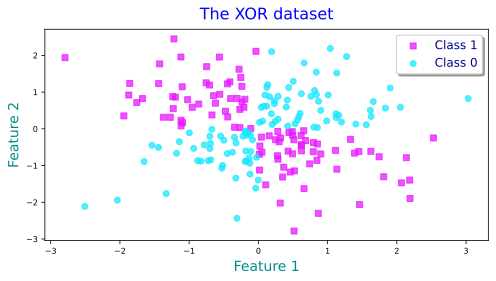

In [22]:
np.random.seed(1)
# X_xor is generated with 200 instances, each having 2 features. The values in this array are random
# samples drawn from a standard normal distribution (mean=0, standard deviation=1).
X_xor = np.random.randn(200, 2)
# y_xor is a 1d array of length 200, and y_xor[n] is False iff X_xor[n,0] and X_xor[n,1] have the
# same value
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# and now its boolean values are converted, to 1 if True, and to 0 otherwise
y_xor = np.where(y_xor, 1, 0)

plt.figure(figsize=(7, 4))
plt.title("The XOR dataset", fontsize=16, color='blue', pad=10)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], marker='s', color=cmap(0.9), alpha=0.75, label="Class 1")
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], marker='o', color=cmap(0.1), alpha=0.75, label="Class 0")
plt.tick_params(axis='both', labelsize=8)
plt.xlabel("Feature 1", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Feature 2", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='best', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Clearly the classes of this dataset can not be separated by a hyperplane, not even by first applying a polynomial function : we need a decision boundary in several pieces (here $2$). In such cases the method of choice is the <font color='#cc33ff'>gaussian kernel SVM</font> (called $\,$<font color='darkpink'>rbf</font>$\,$ for <font color='darkpink'>radial basis function</font> in <font color='#cc33ff'>scikit-learn</font>; see above, "3d. Positive definite kernels and RKHS", "Examples of positive definite kernels").

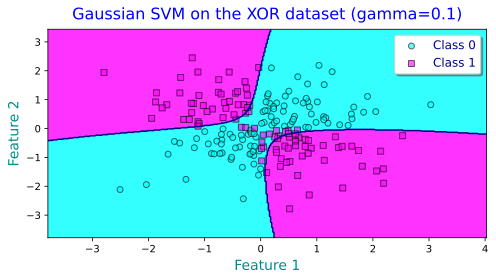

In [23]:
# 'gamma' is the same as in our definition of the gaussian kernel
# as often, scikit-learn is unclear, and does not provide much information about the parameter 'C',
# except that the strength of the regularization is inversely proportional to it
svm_xor_1 = SVC(kernel='rbf', gamma=0.1, C=10, random_state=1)
svm_xor_1.fit(X_xor, y_xor)

plt.figure(figsize=(7, 4))
plt.title("Gaussian SVM on the XOR dataset (gamma=0.1)", fontsize=16, color='blue', pad=10)
plot_decision_regions(X_xor, y_xor, classifier=svm_xor_1)
plt.xlabel("Feature 1", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Feature 2", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper right', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        If we increase the parameter <font color='#cc33ff'>gamma</font>, we increase the variance, and the <font color='#cc33ff'>decision boudary</font> surrounds the training points more closely; for example if we use <font color='#cc33ff'>gamma=</font> <font color='#1aabff'>$10$</font> instead of <font color='#cc33ff'>gamma=</font> <font color='#1aabff'>$0.1$</font> then we get :

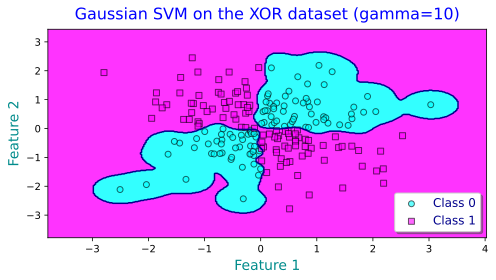

In [24]:
svm_xor_2 = SVC(kernel='rbf', gamma=10, C=10, random_state=1)
svm_xor_2.fit(X_xor, y_xor)

plt.figure(figsize=(7, 4))
plt.title("Gaussian SVM on the XOR dataset (gamma=10)", fontsize=16, color='blue', pad=10)
plot_decision_regions(X_xor, y_xor, classifier=svm_xor_2)
plt.xlabel("Feature 1", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Feature 2", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='lower right', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can do the same with our $3$ classes <font color='#cc33ff'>Iris dataset</font>. First for <font color='#cc33ff'>gamma=</font> <font color='#1aabff'>$0.1$</font> we get something very close to what we obtained with the soft margin linear SVM (see cell 19) :

Test accuracy for the Gaussian SVM (with gamma=0.1) on the Iris dataset :  0.9777777777777777 



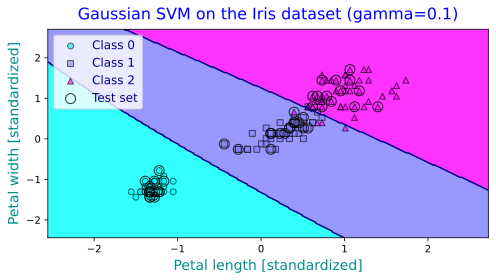

In [25]:
svm_iris_1 = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=1)
svm_iris_1.fit(X_train_std, y_train)
y_pred_svm_iris_1 = svm_iris_1.predict(X_test_std)
# print the test accuracy for the Gaussian SVM (gamma=0.1) on the Iris dataset
print(BB + "Test accuracy for the Gaussian SVM (with gamma=0.1) on the Iris dataset : " + MB,
      accuracy_score(y_test, y_pred_svm_iris_1), "\n")

plt.figure(figsize=(7,4))
plt.title("Gaussian SVM on the Iris dataset (gamma=0.1)", fontsize=16, color='blue', pad=10)
plot_decision_regions(X_combined_std, y_combined, classifier=svm_iris_1, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    And then for <font color='#cc33ff'>gamma=</font> <font color='#1aabff'>$30$</font> :

Test accuracy for the Gaussian SVM (with gamma=30) on the Iris dataset :  0.9777777777777777 



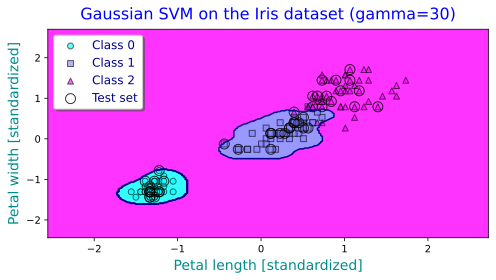

In [26]:
svm_iris_2 = SVC(kernel='rbf', gamma=30, C=1.0, random_state=1)
svm_iris_2.fit(X_train_std, y_train)
y_pred_svm_iris_2 = svm_iris_2.predict(X_test_std)
# print the test accuracy for the Gausian SVM (gamma=30) on the Iris dataset
print(BB + "Test accuracy for the Gaussian SVM (with gamma=30) on the Iris dataset : " + MB,
      accuracy_score(y_test, y_pred_svm_iris_2), "\n")

plt.figure(figsize=(7, 4))
plt.title("Gaussian SVM on the Iris dataset (gamma=30)", fontsize=16, color='blue', pad=10)
plot_decision_regions(X_combined_std, y_combined, classifier=svm_iris_2, test_idx=range(105,150))
plt.xlabel("Petal length [standardized]", labelpad=5, fontsize = 14, color='darkcyan')
plt.ylabel("Petal width [standardized]", labelpad=5, fontsize = 14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<a id="4"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>4. DECISION TREES AND RANDOM FORESTS</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4a. What is a decision tree ?</font><a id="4a"></a></p>

<figure style="text-align: center;">
    <img src="3.5. Example of a decision tree.png" alt="Diagram showing an example of a decision tree. The nodes with children correspond to tests to perform, their branches correspond to the various possible outcomes, and the leaves (the nodes without children) are the final decisions. Any final decision correspond to the branches leading from the root of the tree to the leaf -ie the outcomes of the tests performed along the way. This example diagram deals with which activity to choose according to various tests (eg if we do not have work to do, and it's rainy, and our friend is available, then we go to the cinema)." width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">Example of a decision tree</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        A $\,$<font color='darkpink'>decision tree</font>$\,$ is represented upside-down. It starts at its $\,$<font color='darkpink'>root</font>$\,$, which implicitly contains all the possibilities, and is further down separated into $\,$<font color='darkpink'>nodes</font>$\,$, which perform explicit tests, up to its $\,$<font color='darkpink'>leaves</font>$\,$, which correspond to $\,$<font color='darkpink'>pure nodes</font>$\,$ where only one possibility exists so no more tests are needed.<br>$\quad$
        We speak of $\,$<font color='darkpink'>binary decision trees</font>$\,$ when all the tests only have two possible issues, passed or failed. Traditionnally, the "successful" instances will be in the left child node, the others will be in the right child node.<br>$\quad$
        Children nodes are displayed below their parents, with links between the parent and each of its children; such a link is called a $\,$<font color='darkpink'>branch</font>$\,$. Following branches, we start at $\,$<font color='darkpink'>depth</font>$\,$ $0$ (the depth of the root), and then all the nodes reached after one test are at depth $1$, and so on, the nodes obtained after $n$ tests are at depth $n$.<br>$\quad$
        In the example displayed in the diagram, the possibilities were described by texts, but they could have been real numbers as well, for example the features of the <font color='#cc33ff'>Iris dataset</font>, and a test would be about their values, for example "Is the sepal width ≥ 2.8 ?".<br>$\quad$
        The goal of a <font color='#cc33ff'>decision tree</font> is to learn a series of questions to infer the class labels of the examples. Some advantages of <font color='#cc33ff'>decision trees</font> over other machine learning models is that they can handle both numerical and categorical data, and they are easy to read and interpret. Moreover, for <font color='#cc33ff'>binary decision trees</font>, if the children are about half the size of their parents, then the <font color='#cc33ff'>decision tree</font> contains at most  $\,\log_2(m)\,$ depths, hence a <font color='#cc33ff'>decision tree</font> is relatively cheap to use. But they are expensive to train : for a training matrix containing $m$ instances and $n$ features, the computational complexity is $\: O(m\ln(m) \times n) \,$. Consequently, when there are many instances and features it is necessary to restrict the number of features, and to use random sub-samples instead of the whole samples (at least for the first nodes). But <font color='#cc33ff'>decision trees</font> are very sensitive to outliers, and thus to the choice of samples and features... We will mitigate this instability by first not going too deep into a <font color='#cc33ff'>decision tree</font>, ie we will $\,$<font color='darkpink'>prune</font>$\,$ the tree by setting a limit for its maximum depth, and by combining multiple <font color='#cc33ff'>decision trees</font> inside ensemble methods, notably inside random forests.<br>
<p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p> $\quad$
    Following the book, in this part I only consider <font color='#cc33ff'>decision trees</font> for classification tasks; about <font color='#cc33ff'>decision trees</font> for regression tasks, see our part 7, "4a. The Gradient Boosting strategy", and our part 9, "3a. Non-linear relationships with decision trees" and "3b. Non-linear relationships with random forests"; about "Sensitivity to hyperparameters and instability", see "Hands-on machine learning", part "Decision trees", by A. Géron.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4b. Building a decision tree</font><a id="4b"></a></p>$\quad$
        The strategy followed to train a <font color='#cc33ff'>decision tree</font> is to start at the root and split the data on the feature that results in the largest <font color='darkpink'>information gain</font>, denoted by <font color='#1aabff'>$IG$</font> here (see next paragraph), then repeat this splitting procedure at each node until reaching the leaves (ie the pure nodes), or until reaching the chosen maximum depth. Note that, in practice (eg in libraries like <font color='#cc33ff'>scikit-learn</font>), not all possible splits are considered, since that would be computationally too demanding; only the splits along the feature values are considered (see our part 7, "4a. The Gradient Boosting strategy", the point about regression trees).<br>$\quad$
        The information gain between a parent and its (potential) children depends on the cardinality <font color='#1aabff'>$N_p$</font> of the set of examples inside the parent dataset <font color='#1aabff'>$D_p$</font>, on the cardinalities <font color='#1aabff'>$N_j$</font> of the children datasets <font color='#1aabff'>$D_j$</font> and on an $\,$<font color='darkpink'>impurity measure</font>$\,$ <font color='#1aabff'>$I$</font>, which is a function over all possible datasets. More precisely, if <font color='#1aabff'>$ch$</font> is the number of children,<br><font color='darkpink'>
    $$IG(D_p) \;=\; I(D_p) \,-\, \sum_{j=1}^{ch} \, \frac{N_j}{N_p} I(D_j) \;=\; \frac{1}{N_p} \, \sum_{j=1}^{ch} \, N_j \, \left(I(D_p) - I(D_j) \right) \qquad\quad (60)$$</font>
    so <font color='#1aabff'>$IG(D_p)$</font> is the weighted mean of the difference in impurity between the parent and its children, and we want the children to be as much purer than their parent as possible - just like in real life -.<br>$\quad$
        In practice, we will only use <font color='#cc33ff'>binary decision trees</font>, so $(60)$ becomes<br><font color='darkpink'>
    $$IG(D_p) \;=\; I(D_p) \,-\, \frac{N_{left}}{N_p} I(D_{left}) \,-\, \frac{N_{right}}{N_p} I(D_{right}) \qquad\quad (61)$$</font><br>$\quad$
        There are three <font color='#cc33ff'>impurity measures</font> that are commonly used with <font color='#cc33ff'>binary decision trees</font>. Given a dataset <font color='#1aabff'>$D$</font>, they depend on the proportions of each class inside <font color='#1aabff'>$D$</font>. Let's denote by <font color='#1aabff'>$K$</font> the number of classes and by $\,p_1, \cdots, p_{K}\,$ their relative proportions. These impurity measures are :<ul>
<li> the $\,$<font color='darkpink'>Gini impurity</font>$\,$ :<div style="margin-top: 10px"></div><font color='darkpink'>
        $$I_G(D) \;=\; 1 \,-\, \sum_{i=1}^{K} \, p_i^2 \;=\; \sum_{i=1}^{K} \, p_i \left(1 - p_i \right) \qquad\quad (62)$$</font></li><div style="margin-top: 10px"></div>
<li> the $\,$<font color='darkpink'>entropy</font>$\,$ :<div style="margin-top: 10px"></div><font color='darkpink'>
        $$I_H(D) \;=\; - \, \sum_{i=1}^{K} \, p_i \, \log_2\left(p_i\right) \qquad\quad (63)$$</font></li><div style="margin-top: 10px"></div>
<li> the $\,$<font color='purple'>classification error</font>$\,$ :<div style="margin-top: 10px"></div><font color='purple'>
        $$I_E(D) \;=\; 1 \,-\, \max_{\substack{i=1,\cdots, K}}\; p_i \qquad\quad (64)$$</font></li></ul><div style="margin-top: 10px"></div>
        Note that, if a node is pure, there is one $p_i$ with value $1$, the others are $0$, and all three impurity measures have a value of $0$.<br><br>$\quad$
        When there are only two classes (binary classification) these expressions become :<ul>
<li> the <font color='darkpink'>Gini impurity for binary classification</font> :<br><font color='darkpink'>
        $$I_G(D) \;=\; 2 \, p \left(1 - p \right) \qquad\quad (65)$$</font></li><div style="margin-top: 10px"></div>
<li> the <font color='darkpink'>entropy for binary classification</font> :<div style="margin-top: 10px"></div><font color='darkpink'>
        $$I_H(D) \;=\; - \, p \, \log_2(p) \,-\, (1-p) \, \log_2(1-p) \qquad\quad (66)$$</font></li><div style="margin-top: 10px"></div>
<li> the <font color='purple'>classification error for binary classification</font> :<div style="margin-top: 10px"></div><font color='purple'>
        $$I_E(D) \;=\; 1 \,-\, \max\{p, 1-p\} \qquad\quad (67)$$</font></li></ul><div style="margin-top: 10px"></div><br>$\quad$
        Let's represent them, together with a scaled version of the <font color='#cc33ff'>entropy</font> (half of it) to observe that the <font color='#cc33ff'>Gini impurity</font> is an intermediate measure between the <font color='#cc33ff'>entropy</font> and the <font color='#cc33ff'>classification error</font> :

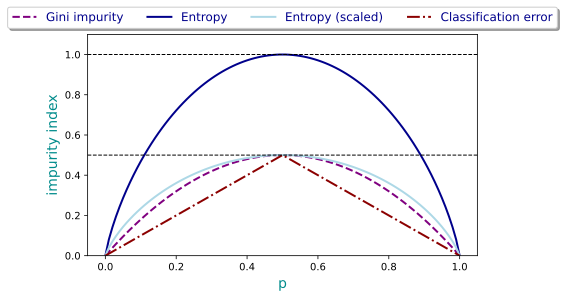

In [27]:
def gini(p):
    return 2*p*(1 - p)

def entropy(p):
    if p == 0 or p == 1: return 0
    else: return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p):
    return 1 - np.max([p, 1 - p])

# generate an array of values from 0.0 to 1.0 (included) with a step of 0.01
x = np.arange(0., 1.01, 0.01)
gini = [gini(i) for i in x]
ent = [entropy(p) if p != 0 else 0 for p in x]
sc_ent = [.5*e for e in ent]
err = [error(i) for i in x]

# create a new figure
plt.figure(figsize=(7, 4))
# create a subplot within the figure
ax = plt.subplot(111)
# 'zip' unites the 4 1d arrays into a 2d array, and then the loop contains only 4 rounds of plotting,
# the first with the values i=gini, lab='Gini impurity', ls='--' and c='purple' and the last with
# i=err, lab='Classification error', ls='-.' and c='darkred'
for i, lab, ls, c in zip([gini, ent, sc_ent, err],
                          ['Gini impurity', 'Entropy', 'Entropy (scaled)', 'Classification error'],
                          ['--', '-', '-', '-.'],
                          ['purple', 'darkblue', 'lightblue', 'darkred']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
#* loc='upper center' : places the legend at the upper center of the plot
#* bbox_to_anchor=(0.5, 1.15) : sets the center of the legend box to be at (0.5, 1.15) in the
# coordinates system of the figure
#* ncol=4 : specifies the number of columns in the legend box
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True, fontsize=12,
          labelcolor='darkblue')
# adds a horizontal black dashed line of width 1 at y=0.5 and y=1
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel("p", labelpad=5, fontsize = 14, color='darkcyan')
plt.ylabel("impurity index", labelpad=5, fontsize = 14, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The <font color='#cc33ff'>classification error impurity measure</font> is not recommended for growing a <font color='#cc33ff'>decision tree</font>, since it is less sensitive to changes in the class probabilities of the nodes than the other two <font color='#cc33ff'>impurity measures</font>. Moreover, in practice, both the <font color='#cc33ff'>Gini impurity</font> and the <font color='#cc33ff'>entropy measure</font> typically yield very similar results, and it is often not worth spending much time on evaluating trees using different <font color='#cc33ff'>impurity criteria</font> rather than experimenting with different pruning cut-offs, so the simpler <font color='#cc33ff'>Gini impurity</font> should be favored.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4c. Example of a decision tree</font><a id="4c"></a></p>$\quad$
        Standard <font color='#cc33ff'>decision trees</font>, like the <font color='#cc33ff'>decision trees</font> used in <font color='#cc33ff'>scikit-learn</font>, are <font color='#cc33ff'>binary decision trees</font>. And they do not consider all possible splits of the parent's instances, as this would be computationally too demanding (plus the more complex the <font color='#cc33ff'>trees</font>, the greater the risk of <font color='#cc33ff'>overfitting</font>). Instead, the only possible splits are the ones done according to a hyperplane perpendicular to one of the features (and separating the parent's instances into two non-empty groups). More precisely, the split is done according to the "best" hyperplane in the set <font color='#1aabff'>$\mathcal{H}$</font> of hyperplanes defined by a single feature and a threshold.<br>$\quad$
        This is how <font color='#1aabff'>$\mathcal{H}$</font> is built : for <font color='#1aabff'>$j=1,\cdots,n$</font> collect and sort the feature values <font color='#1aabff'>$x^{(i)}_j$</font> of the instances in the node; say we get <font color='#1aabff'>$\;a^{(1)}_j < a^{(2)}_j < \cdots < a^{(p_j)}_j\;$</font> where <font color='#1aabff'>$p_j$</font> depends on the instances in the node. And then, compute their contiguous means, which will be our thresholds : <font color='#1aabff'>$\;h^{(k)}_j = \frac{a^{(k)}_j + a^{(k+1)}_j)}{2}\;$</font> for <font color='#1aabff'>$\;k=1,\cdots, p_j\!-\!1\,$</font>. We get <font color='#1aabff'>$(p_j\!-\!1)$</font> splitting hyperplanes along the <font color='#1aabff'>$j$</font>-th axis : <font color='#1aabff'>$\,\mathcal{H}^{(k)}_j = \Big\{x \in \mathbb{R}^n \:;\;\; x_j = h^{(k)}_j \Big\}\,$</font> for <font color='#1aabff'>$\;k=1,\cdots, p_j\!-\!1\,$</font>. We do this for all <font color='#1aabff'>$\,j=1,\cdots,n \,$</font>, and <font color='#1aabff'>$\mathcal{H}$</font> is our collection of axis-aligned hyperplanes, <font color='#1aabff'>$\,\mathcal{H} = \Big\{\mathcal{H}^{(k)}_j \:;\;\; j=1,\cdots,n \;\text{ and }\; k=1,\cdots, p_j \Big\}\,$</font>. Any hyperplane <font color='#1aabff'>$H$</font> of <font color='#1aabff'>$\mathcal{H}$</font> naturally splits the instances in the node into two groups, the instances on one side of <font color='#1aabff'>$H$</font>, and the instances on the other side.<br>
    The "best" hyperplane among the hyperplanes in <font color='#1aabff'>$\mathcal{H}$</font> is the hyperplane which minimizes the chosen <font color='#cc33ff'>impurity measure</font> : compute the proportion <font color='#1aabff'>$p$</font> of instances of class <font color='#1aabff'>$0$</font> in the <font color='#cc33ff'>parent node</font>, and in each <font color='#cc33ff'>child</font> for all the potential splits; from there compute all potential <font color='#cc33ff'>impurities</font>; and choose the split which yields the <font color='#cc33ff'>lowest impurity</font>.<br><br>$\quad$
        In the following, we will only consider standard <font color='#cc33ff'>decision trees</font>. (Standard) <font color='#cc33ff'>decision trees</font> can build complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the <font color='#cc33ff'>decision tree</font>, the more complex the decision boundary becomes, which can easily result in overfitting (even when only considering standard <font color='#cc33ff'>decision trees</font>).<br>$\quad$
        <font color='#cc33ff'>Decision trees</font> are implemented in the <font color='#cc33ff'>scikit-learn</font>'s class <font color='#cc33ff'>DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=None)</font> from their <font color='#cc33ff'>tree</font> module, where I have selected the following parameters :<ul>
    <li><font color='#cc33ff'>criterion='gini'</font> : the <font color='#cc33ff'>impurity measure</font>; can be <font color='#cc33ff'>criterion=</font><font color='#1aabff'>'gini'</font> or <font color='#cc33ff'>criterion=</font><font color='#1aabff'>'entropy'</font></li>
    <li><font color='#cc33ff'>max_depth=None</font> : the maximum <font color='#cc33ff'>depth</font> of the tree; by default, each <font color='#cc33ff'>node</font> is split, unless it is pure or it contains less than <font color='#cc33ff'>min_samples_split</font> samples</font></li>
    <li><font color='#cc33ff'>min_samples_split=2</font> : the minimum number of samples required to split a node</li>
    <li><font color='#cc33ff'>min_samples_leaf=1</font> : the minimum number of samples a <font color='#cc33ff'>leaf</font> must have; only splits that leave at least <font color='#cc33ff'>min_samples_leaf</font> training samples in each of the left and right branches will be considered. "This may have the effect of smoothing the model, especially in regression."</li>
    <li><font color='#cc33ff'>random_state=None</font> : if the <font color='#cc33ff'>impurity</font> is identical for several splits, then a split will be selected at random; specifying a <font color='#cc33ff'>random_state</font> integer ensures reproducibility</li></ul><div style="margin-top: 20px"></div>$\quad$
        We will now train a <font color='#cc33ff'>decision tree</font> with a maximum depth of 4, using the Gini impurity. After executing the code example, we obtain the typical axis-parallel decision boundaries of the <font color='#cc33ff'>decision trees</font>.<br><br>
    <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Notes :</font></p><ul>
<li> instead of stopping the growing of the tree at a certain depth we can stop it until all its nodes are either pure or contain less than a chosen number of samples, called $\,$<font color='#cc33ff'>min_samples_split</font>$\,$ in <font color='#cc33ff'>scikit-learn</font></li>
<li> although feature scaling may be desired for visualization purposes, it is of little use for training <font color='#cc33ff'>decision trees</font> since they only deal with proportions, not values.</li></ul>

Test accuracy for the fully grown tree on the Iris dataset :  0.9777777777777777 



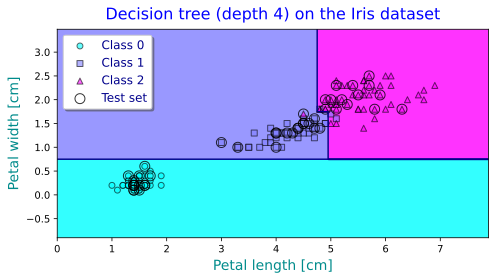

In [28]:
from sklearn.tree import DecisionTreeClassifier
# 'criterion' can be "gini" (the default value), "entropy", or "log-loss" - not presented here -
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
# print the test accuracy for the single tree on the Iris dataset
print(BB + "Test accuracy for the fully grown tree on the Iris dataset : " + MB,
      accuracy_score(y_test, y_pred_tree), "\n")

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(7, 4))
plt.title("Decision tree (depth 4) on the Iris dataset", fontsize=16, color='blue', pad=10)
# 'plot_decision_regions' has been defined cell 8
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel("Petal length [cm]", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Petal width [cm]", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Using $\,$<font color='#cc33ff'>tree.plot_tree</font>$\,$ from <font color='#cc33ff'>scikit-learn</font>, we can draw a decision tree after training :

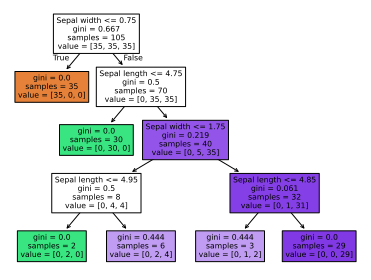

In [29]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
#* 'tree_model' is the name of our decision tree (previous cell)
#* 'filled=True' colors the nodes with the color which represents the majority class in that
# particular node and the color gradient represents the distribution of classes in the node
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4d. Random forests</font><a id="4d"></a></p>$\quad$
        Consider a binary classification task, with many predictors; even if individually they are not great, say they only have a $51\%$ accuracy, if we train enough of them and average their results we will get as good an accuracy as needed, according to the law of large numbers. The same is true if there are more than two classes. This is the idea behind $\,$<font color='darkpink'>random forests</font>$\,$ : instead of training one single <font color='#cc33ff'>decision tree</font> at its fullest (and risk overfitting with too closely fitted decision boundaries), grow several hundreds of small trees using less features than the original one and average their results.<br>$\quad$
        Now, let's explain how we can grow many trees from a single training set and aggregate their results.<br>
    <font color='magenta'>1. Draw a sample :</font> typically a small <font color='#cc33ff'>decision tree</font> will contain as many instances as the original one, ie $m$. In general we do not take all the instances of the training matrix, though this is an option called the $\,$<font color='darkpink'>pasting method</font>$\,$; instead we randomly choose $m$ instances with replacement (ie randomly choose one and replace it; do this $m$ times), this option being called the $\,$<font color='darkpink'>bagging method</font>$\,$ from $\,$<font color='darkpink'>bootstrap (aggregating)</font>$\,$ ($\,$<font color='darkpink'>bootstrap</font>$\,$ being the technique of sampling with replacement). Note that, since the instances have been chosen with replacement, some are present multiple times, while others are not present. When we choose $m$ instances for a subset each instance has a chance of $\left(\frac{m-1}{m}\right)^m$ to not be present in the final subset ; $\left(\frac{m-1}{m}\right)^m$ grows with $m$ and converges to $e^{-1}$ ($\simeq 36.8\%$) ; for example for $m\!=\!100\,$ the probability that an instance will not be chosen in a subset is already $36.6\%$. $\,$<font color='#cc33ff'>bootstrap=True</font>$\,$ is the default on <font color='#cc33ff'>scikit-learn</font>; and the default number of instances for each small tree is $\,$<font color='#cc33ff'>max_samples=None</font>$\,$, ie $m$.<br>
    <font color='magenta'>2. grow a decision tree from the sample but, at each node, only use $d$ features, randomly chosen</font> (without replacement) and, as usual, split the node using the feature that provides the best split according to the information gain. Usually we use $\, d = \sqrt n \,$ features, although it is possible to choose the $\log_2$, or the same number of features than the original number. $\,$<font color='#cc33ff'>max_features='sqrt'</font>$\,$ is the default on <font color='#cc33ff'>scikit-learn</font>; and the default impurity measure is $\,$<font color='#cc33ff'>criterion='gini'</font>$\,$.<br>
    <font color='magenta'>3. Grow a sufficient number of these small trees</font>. By default $\,$<font color='#cc33ff'>n_estimators=100</font>$\,$ on <font color='#cc33ff'>scikit-learn</font>.<br>
    <font color='magenta'>4. The predicted class for any instance will then be the class which receives the most votes</font> by our set of predictors.<br>$\quad$
        Although random forests don’t offer the same level of interpretability as <font color='#cc33ff'>decision trees</font>, a big advantage of random forests is that we don’t have to worry much about choosing good hyperparameter values. We typically don’t need to prune the random forest since the ensemble model is quite robust to noise from averaging the predictions among the individual <font color='#cc33ff'>decision trees</font>. The only parameter that we
need to care about in practice is the number of trees that we choose for the random forest.

<div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The book proposes one example of random forest, based on the growing of 25 <font color='#cc33ff'>decision trees</font> for the <font color='#cc33ff'>Iris dataset</font>. Its <font color='#cc33ff'>test accuracy</font> is excellent ($97.78\%$), and using $2000$ trees instead of $25$ would yield the exact same accuracy (the <font color='#cc33ff'>Iris dataset</font> is a simple dataset). The next code illustrates the results. It shows that the random forest achieves an excellent <font color='#cc33ff'>test accuracy</font>, but it is no better than the <font color='#cc33ff'>test accuracy</font> obtained with our single fully grown tree (also $97.78\%$), which is uncommon.<br>$\quad$
        Therefore, I will add an example based on 300 instances from the <font color='#cc33ff'>make_moons</font> dataset to show the difference in accuracy between a fully grown <font color='#cc33ff'>decision tree</font> (grown with <font color='#cc33ff'>min_samples_split = </font><font color='#1aabff'>2</font>), and $100$ small trees (grown with <font color='#cc33ff'>max_depth = </font><font color='#1aabff'>3</font>): we'll see that <font color='darkpink'>the random forest is better than the single fully grown tree both in accuracy scores and in the smoothness of the decision boundaries</font>, which is the common result.<br><br>
    <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p>$\quad$
        The <font color='#cc33ff'>Linear SVM</font>, the <font color='#cc33ff'>Gaussian SVM</font> (with both <font color='#cc33ff'>gamma =</font> <font color='#1aabff'>0.1</font> and <font color='#cc33ff'>gamma =</font> <font color='#1aabff'>30</font>), the fully grown <font color='#cc33ff'>decision tree</font>, and the <font color='#cc33ff'>random forest</font> with $25$ simple trees (in fact even $2$ simple trees would suffice), all yield the exact same $97.78\%$ <font color='#cc33ff'>test accuracy</font> score; we will even obtain $100\%$ <font color='#cc33ff'>test accuracy</font> below with a <font color='#cc33ff'>k-NN</font>. This shows that the <font color='#cc33ff'>Iris dataset</font> is great to present new algorithms, but to really compare them we need a more challenging dataset, like our <font color='#cc33ff'>make_moons</font> dataset, which can be as noisy as we want it to be. It's not a one-fits-all dataset, though, as we'll see in a moment.

Test accuracy for the random forest on the Iris dataset :  0.9777777777777777 



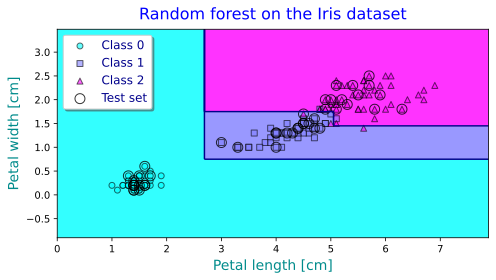

In [30]:
from sklearn.ensemble import RandomForestClassifier
# 'n_jobs' specifies the number of processor cores to use for this computation
forest = RandomForestClassifier(n_estimators=2, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# print the test accuracy for the random forest on the Iris dataset
print(BB + "Test accuracy for the random forest on the Iris dataset : " + MB,
      accuracy_score(y_test, y_pred_forest), "\n")

plt.figure(figsize=(7,4))
plt.title("Random forest on the Iris dataset", fontsize=16, color='blue', pad=10)
# plot_decision_regions was defined cell 8
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel("Petal length [cm]", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("Petal width [cm]", labelpad=5, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        <font color='purple'>$\blacksquare\;\,$<font color='darkpink'><font size=4><strong>Comparison between a single fully grown decision tree and a simple random forest</strong></font></font></font><div style="margin-top: 10px"></div>$\quad$
        Let's complicate our make_moons dataset by introducing more noise ($0.3$ instead of $0.1$). We also increase the number of samples ($300$ vs $100$), and accordingly slightly increase the proportion allocated to the training set, so that the model can learn better while still having enough instances to test on (<font color='#cc33ff'>train_size = </font><font color='#1aabff'>0.75</font> vs <font color='#cc33ff'>train_size = </font><font color='#1aabff'>0.7</font>). Then we'll have a more meaningful dataset to compare a fully grown tree and a random forest with trees of <font color='#cc33ff'>max_depth = </font><font color='#1aabff'>3</font>. We see that the simple random forest yields better results than a fully grown tree; we will obtain better results with a <font color='#cc33ff'>k-NN</font>, though (see below). Also, the decision boundary is much smoother :

Test accuracy for the fully grown tree :  0.8666666666666667
Test accuracy for the random forest :  0.9066666666666666


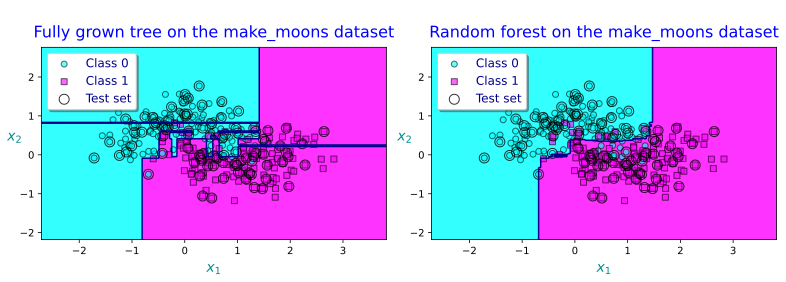

In [31]:
# 'noise' specifies the standard deviation of Gaussian noise added to the data
Xm, ym = make_moons(n_samples=300, noise=0.30, random_state=42)
# shuffles the instances before splitting, using 70% of them for training
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, train_size=.75, random_state=42)

# define and train the predictors
from sklearn.tree import DecisionTreeClassifier
# first, a single decision tree
tree_clf = DecisionTreeClassifier(min_samples_split=2, random_state=42)
tree_clf.fit(Xm_train, ym_train)
ym_pred_tree = tree_clf.predict(Xm_test)
# second, a set of 100 decision trees
bag_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, n_jobs=2)
bag_clf.fit(Xm_train, ym_train)
ym_pred_forest = bag_clf.predict(Xm_test)

# print the test accuracy for both the single tree and the random forest on the Iris dataset
print(BB + "Test accuracy for the fully grown tree : " + MB, accuracy_score(ym_test, ym_pred_tree))
print(BB + "Test accuracy for the random forest : " + MB, accuracy_score(ym_test, ym_pred_forest))

Xm_combined = np.vstack((Xm_train, Xm_test))
ym_combined = np.hstack((ym_train, ym_test))

# we draw the graphs
fig, ax = plt.subplots(1,2, figsize=(11,4))
ax[0].set_title("\nFully grown tree on the make_moons dataset", fontsize=16, color='blue', pad=10)
# 'plot_decision_regions' has been defined cell 8; since we want to use an external function on 'ax[0]',
# we first focus Matplotlib's attention on it
plt.sca(ax[0])
plot_decision_regions(Xm_combined, ym_combined, classifier=tree_clf, test_idx=range(210, 300))
plt.xlabel("$x_1$", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("$x_2$", labelpad=5, rotation=0, fontsize=14, color='darkcyan')
ax[0].legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')

ax[1].set_title("\nRandom forest on the make_moons dataset", fontsize=16, color='blue', pad=10)
plt.sca(ax[1])
plot_decision_regions(Xm_combined, ym_combined, classifier=bag_clf, test_idx=range(210, 300))
plt.xlabel("$x_1$", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("$x_2$", labelpad=5, rotation=0, fontsize=14, color='darkcyan')
ax[1].legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 12px; font-weight: 500; color: darkblue">$\quad$
        <font color='purple'>$\blacksquare\;\,$<font color='darkpink'><font size=4><strong>Accuracy score and decision boundary of a Gaussian SVM</strong></font></font><div style="margin-top: 10px"></div>

Test accuracy for the Gaussian SVM :  0.9066666666666666


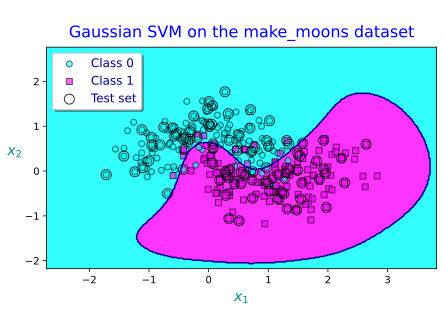

In [32]:
svm = SVC(kernel='rbf', gamma=1, C=20, random_state=42)
svm.fit(Xm_train, ym_train)
ym_pred_svm = svm.predict(Xm_test)
print(BB + "Test accuracy for the Gaussian SVM : " + MB, accuracy_score(ym_test, ym_pred_svm))

plt.figure(figsize=(7, 4))
plt.title("\nGaussian SVM on the make_moons dataset", fontsize=16, color='blue', pad=10)
plot_decision_regions(Xm_combined, ym_combined, classifier=svm, test_idx=range(210, 300))
plt.xlabel("$x_1$", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("$x_2$", labelpad=10, rotation=0, fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.show()

<a id="Appendix"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>APPENDIX - K-NEAREST NEIGHBORS</font></h4>$\quad$
        The <font color='darkpink'>k-NN algorithm</font> is fairly straightforward and can be summarized by the following steps:<br></font><font color='magenta'>
    1. Choose the number k of neighbors to be considered, and a distance metric</font>. On <font color='#cc33ff'>scikit-learn</font> the default value for k is $\,$<font color='#cc33ff'>k=5</font>$\,$. The metric is usually an $l^p$ distance; for example the distance between the instance $x$ to be classified and another instance $z$ would be</font><div style="margin-top: 10px"></div><font color='darkpink'>
    $$\left\lVert z-x \right\rVert_p \;=\; \left(\sum_{i=1}^n \left(z^{(i)} - x^{(i)}\right)^p \right)^{\frac{1}{p}} \qquad\quad (68)$$</font><div style="margin-top: 10px"></div>$\quad$
        Often it is the euclidean distance ($p=2$); for example the default on <font color='#cc33ff'>scikit-learn</font> is $\,$<font color='#cc33ff'>p=2</font>$\,$.<br><font color='magenta'>
    2. Find in the dataset the k nearest neighbors of the instance that we want to classify</font>. The computational complexity for classifying new examples grows linearly with the number of examples in the dataset. Moreover large datasets can also be problematic in terms of limited storage capacities. However the computational cost is manageable as long as we are working with relatively small to medium-sized datasets, in which case k-NN algorithms provide good predictive results. They are indeed a good choice for approaching many real-world problems. Recent examples of using k-nearest neighbor methods include predicting properties of pharmaceutical drug
targets and state-of-the-art language models.<br><font color='magenta'>
    3. Assign the class label by majority vote</font> (see diagram below). When there is a tie <font color='#cc33ff'>scikit-learn</font> will attribute the label of the nearest neighbor, and if there is still a tie then the algorithm will choose the class label that comes first in the dataset.

<figure style="text-align: center;">
    <img src="3.6. The knn strategy.png" alt="Diagram showing a point whose label is yet to be predicted, and its 5 nearest neighbors : 3 triangles, 1 plus and 1 circle; since there are more triangles the point is predicted to be a triangle as well." width="350" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">The k-NN strategy</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    <font color='purple'>$\blacksquare\;\,$<font color='darkpink'><font size=4><strong>Accuracy score and decision boundary of a k-NN</strong></font></font></font><div style="margin-top: 10px"></div>$\quad$
        As an illustration, let's use <font color='#cc33ff'>scikit-learn</font>'s <font color='#cc33ff'>knn</font> algorithm <font color='#cc33ff'>KNeighborsClassifier</font>, and apply it to the non-rescaled, the standar<font color='#cc33ff'>standardized</font> and the <font color='#cc33ff'>normalized</font> versions of the <font color='#cc33ff'>Iris dataset</font>. Both rescaling methods help us improve the <font color='#cc33ff'>test accuracy</font> from $97.78\%$ to $100\%$.<br>$\quad$
        Next, we'll apply the same approach, but with the three versions of our make_moons dataset, comparing both the <font color='#cc33ff'>accuracy score</font> and <font color='#cc33ff'>decision boundary</font> smoothness of our <font color='#cc33ff'>k-NN</font> against those of the <font color='#cc33ff'>fully grown decision tree</font>, <font color='#cc33f'>random forest</font>, and <font color='#cc33ff'>Gaussian SVM</font> we obtained earlier. Our <font color='#cc33ff'>k-NN</font> (with <font color='#cc33ff'>n_neighbors = </font><font color='#1aabff'>7</font>) achieves much better results than the <font color='#cc33ff'>random forest</font> and the <font color='#cc33ff'>Gaussian SVM</font>, with up to $96\%$ <font color='#cc33ff'>test accuracy</font> vs $90.67\%$ for the other two. It is quite fast to test here, but keep in mind that the more data we have, the longer it takes to test, because it computes distances between the tested point and every point in the training set.<br>$\quad$
        The make_moons dataset features are already well-balanced, with well-calibrated values, so it is no surprise that using a rescaling algorithm on it not only uses electricity, but also leads to worse results, with "only" $92\%$ <font color='#cc33ff'>test accuracy</font> for both usual rescaling methods. When the features aren't on the same scale, which is common, rescaling them improves the results; it might even be necessary to get results in the first place. We will talk about rescaling more in depth in the following part ("3b. Bringing features onto the same scale").

Test accuracy for the k-NN without rescaling :  0.9777777777777777
Test accuracy for the k-NN with standardization :  1.0
Test accuracy for the k-NN with normalization :  1.0


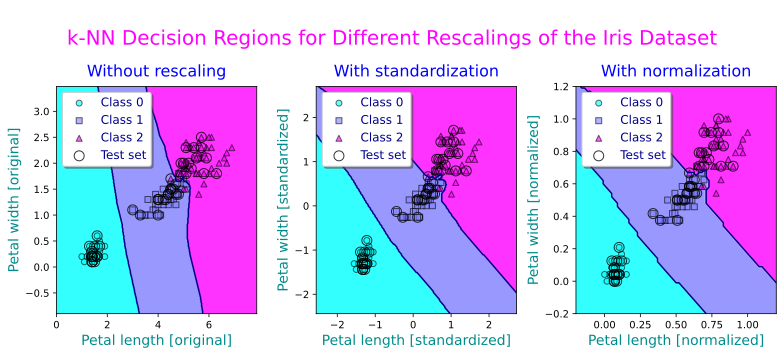

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Train the knn model using the non-rescaled training set
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, y_train)
# Train the knn model using the standardized training set
knn_std = KNeighborsClassifier(n_neighbors=5, p=2)
knn_std.fit(X_train_std, y_train)

# Apply Min-Max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
# Train the knn model using the normalized training set
knn_norm = KNeighborsClassifier(n_neighbors=5, p=2)
knn_norm.fit(X_train_norm, y_train)

# Test accuracies for the Iris dataset
y_pred_knn = knn.predict(X_test)
print(BB + "Test accuracy for the k-NN without rescaling : " + MB, accuracy_score(y_test, y_pred_knn))
y_pred_knn_std = knn_std.predict(X_test_std)
print(BB + "Test accuracy for the k-NN with standardization : " + MB, accuracy_score(y_test, y_pred_knn_std))
y_pred_knn_norm = knn_norm.predict(X_test_norm)
print(BB + "Test accuracy for the k-NN with normalization : " + MB, accuracy_score(y_test, y_pred_knn_norm))

# Combine the normalized train and test sets for plotting
X_combined_norm = np.vstack((X_train_norm, X_test_norm))
y_combined = np.hstack((y_train, y_test))

# Plot the decision regions
fig, ax = plt.subplots(1, 3, figsize=(11, 5))
plt.suptitle("\nk-NN Decision Regions for Different Rescalings of the Iris Dataset", fontsize=20, color='magenta')
# On the original dataset
plt.sca(ax[0])
ax[0].set_title("Without rescaling", fontsize=16, color='blue', pad=10)
plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx=range(105, 150))
ax[0].set_xlabel("Petal length [original]", fontsize=14, color='darkcyan')
ax[0].set_ylabel("Petal width [original]", fontsize=14, color='darkcyan')
ax[0].legend(loc='best', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
# On the standardized Iris dataset
plt.sca(ax[1])
ax[1].set_title("With standardization", fontsize=16, color='blue', pad=10)
plot_decision_regions(X_combined_std, y_combined, classifier=knn_std, test_idx=range(105,150))
ax[1].set_xlabel("Petal length [standardized]", fontsize=14, color='darkcyan')
ax[1].set_ylabel("Petal width [standardized]", fontsize=14, color='darkcyan')
ax[1].legend(loc='best', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
# On the normalized dataset
plt.sca(ax[2])
ax[2].set_title("With normalization", fontsize=16, color='blue', pad=10)
plot_decision_regions(X_combined_norm, y_combined, classifier=knn_norm, test_idx=range(105, 150))
# since we know that all normalized values will be in [0,1]*[0,1], we restrict the axes to [-0.2,1.2]
ax[2].set_xlim(-0.2, 1.2), ax[2].set_ylim(-0.2, 1.2)
ax[2].set_xlabel("Petal length [normalized]", fontsize=14, color='darkcyan')
ax[2].set_ylabel("Petal width [normalized]", fontsize=14, color='darkcyan')
ax[2].legend(loc='best', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

Test accuracy for the k-NN without rescaling :  0.96
Test accuracy for the k-NN with standardization :  0.92
Test accuracy for the k-NN with normalization :  0.92


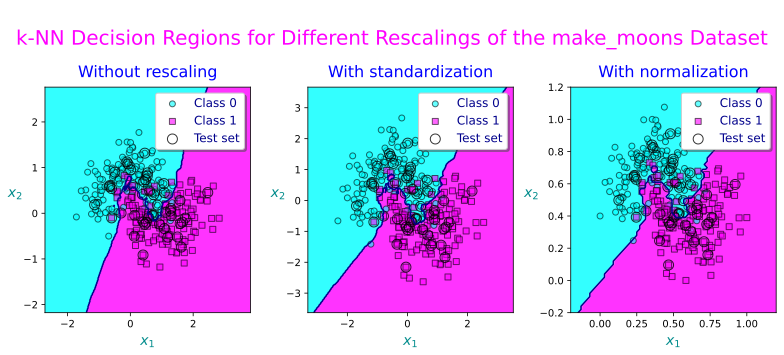

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Train the knn model using the non-rescaled training set
knn_m = KNeighborsClassifier(n_neighbors=7, p=2)
knn_m.fit(Xm_train, ym_train)

# Apply standardization
scaler_m_std = StandardScaler()
Xm_train_std = scaler_m_std.fit_transform(Xm_train)
Xm_test_std = scaler_m_std.transform(Xm_test)
# Train the knn model using the standardized training set
knn_m_std = KNeighborsClassifier(n_neighbors=7, p=2)
knn_m_std.fit(Xm_train_std, ym_train)

# Apply Min-Max normalization
scaler_m_norm = MinMaxScaler()
Xm_train_norm = scaler_m_norm.fit_transform(Xm_train)
Xm_test_norm = scaler_m_norm.transform(Xm_test)
# Train the knn model using the normalized training set
knn_m_norm = KNeighborsClassifier(n_neighbors=7, p=2)
knn_m_norm.fit(Xm_train_norm, ym_train)

# Test accuracies for the make_moons dataset
ym_pred_knn = knn_m.predict(Xm_test)
print(BB + "Test accuracy for the k-NN without rescaling : " + MB, accuracy_score(ym_test, ym_pred_knn))
ym_pred_knn_std = knn_m_std.predict(Xm_test_std)
print(BB + "Test accuracy for the k-NN with standardization : " + MB, accuracy_score(ym_test, ym_pred_knn_std))
ym_pred_knn_norm = knn_m_norm.predict(Xm_test_norm)
print(BB + "Test accuracy for the k-NN with normalization : " + MB, accuracy_score(ym_test, ym_pred_knn_norm))

# Combine the standardized train and test sets for plotting
Xm_combined_std = np.vstack((Xm_train_std, Xm_test_std))
ym_combined_std = np.hstack((ym_train, ym_test))
# Combine the normalized train and test sets for plotting
Xm_combined_norm = np.vstack((Xm_train_norm, Xm_test_norm))
ym_combined_norm = np.hstack((ym_train, ym_test))

# Plot the decision regions
fig, ax = plt.subplots(1, 3, figsize=(11, 5))
plt.suptitle("\nk-NN Decision Regions for Different Rescalings of the make_moons Dataset", fontsize=20, color='magenta')
# On the original dataset
plt.sca(ax[0])
ax[0].set_title("Without rescaling", fontsize=16, color='blue', pad=10)
plot_decision_regions(Xm_combined, ym_combined, classifier=knn_m, test_idx=range(105, 150))
plt.xlabel("$x_1$", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("$x_2$", labelpad=8, rotation=0, fontsize=14, color='darkcyan')
ax[0].legend(loc='best', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
# On the standardized Iris dataset
plt.sca(ax[1])
ax[1].set_title("With standardization", fontsize=16, color='blue', pad=10)
plot_decision_regions(Xm_combined_std, ym_combined_std, classifier=knn_m_std, test_idx=range(105,150))
plt.xlabel("$x_1$", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("$x_2$", labelpad=8, rotation=0, fontsize=14, color='darkcyan')
ax[1].legend(loc='best', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
# On the normalized dataset
plt.sca(ax[2])
ax[2].set_title("With normalization", fontsize=16, color='blue', pad=10)
plot_decision_regions(Xm_combined_norm, ym_combined_norm, classifier=knn_m_norm, test_idx=range(105, 150))
# since we know that all normalized values will be in [0,1]*[0,1], we restrict the axes to [-0.2,1.2]
ax[2].set_xlim(-0.2, 1.2), ax[2].set_ylim(-0.2, 1.2)
plt.xlabel("$x_1$", labelpad=5, fontsize=14, color='darkcyan')
plt.ylabel("$x_2$", labelpad=8, rotation=0, fontsize=14, color='darkcyan')
ax[2].legend(loc='upper right', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()